# Title
## Data-Driven Impact Analysis On Modeling Earthquake Damage


## Team
 
 - Chandan Satwani

   


## Problem statement

- This study aims to analyze a dataset containing information on buildings impacted by the Gorkha earthquake in a specific region. The goal is to identify key factors influencing building vulnerability, including age, floor count, area, height, roof type, foundation, and superstructure materials. By examining geographic location, land surface condition, legal ownership, and secondary uses, the study seeks to understand their relationship with building resilience. The findings will inform policymakers and urban planners on effective earthquake risk mitigation strategies, improving building codes, construction practices, and disaster response efforts to create safer communities in earthquake-prone areas.

![](https://cdn-images-1.medium.com/max/1600/0*tAAY-S5oNuSSL0GI.jpg)

# Packages

In [376]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [377]:
from sklearn.preprocessing import LabelEncoder

## Dataset Operation

In [378]:
df=pd.read_csv("train_values.csv")
label=pd.read_csv("train_labels.csv")

In [379]:
label

building_id  damage_grade
0            802906             3
1             28830             2
2             94947             3
3            590882             2
4            201944             3
...             ...           ...
260596       688636             2
260597       669485             3
260598       602512             3
260599       151409             2
260600       747594             3

[260601 rows x 2 columns]

## Description

- The dataset provided comprises information about buildings impacted by the Gorkha earthquake in a specific region. It contains 39 columns, with each row representing a unique building identified by a random building_id. The dataset's main features include geographic region details (geo_level_1_id, geo_level_2_id, geo_level_3_id), building characteristics such as the number of floors, age, area, and height percentage. Additionally, it includes data on land surface condition and foundation type. Roof and ground floor types, along with other floor constructions, are also described. Building position, plan configuration, legal ownership status, and the number of families residing in each building are part of the dataset. Furthermore, there are binary flags indicating the presence of specific superstructure materials and whether the building has secondary uses like agriculture, hotels, rentals, institutions, schools, industries, health posts, government offices, police stations, or other purposes. This dataset presents a valuable resource for analyzing earthquake vulnerability, predicting damages, and devising strategies for enhancing earthquake resilience in the region, benefiting researchers, policymakers, and urban planners.

In [380]:
df

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ...  \
0                           t               r  ...   
1                           o               r  ...   
2                           t               r  ...   
3                           t               r  ...   
4                           t               r  ...   
...                       ...             ...  ...   
260596                      n               r  ...   
260597                      t               r  ...   
260598                      t               r  ...   
260599                      t               r  ...   
260600                      n               r  ...   

       has_secondary_use_agriculture has_secondary_use_hotel  \
0                                  0                       0   
1                                  0                       0   
2                                  0                       0   
3                                  0                       0   
4                                  0                       0   
...                              ...                     ...   
260596                             0                       0   
260597                             0                       0   
260598                             0                       0   
260599                             0                       0   
260600                             0                       0   

       has_secondary_use_rental has_secondary_use_institution  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
...                         ...                           ...   
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school  has_secondary_use_industry  \
0                           

In [381]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [382]:
label.shape

(260601, 2)

In [383]:
label.isnull().sum()

building_id     0
damage_grade    0
dtype: int64

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [385]:
df.shape

(260601, 39)

In [386]:
df=pd.merge(df,label,how='right')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [387]:
y=pd.merge(df,label,how='left')
y

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                           t               r  ...                       0   
1                           o               r  ...                       0   
2                           t               r  ...                       0   
3                           t               r  ...                       0   
4                           t               r  ...                       0   
...                       ...             ...  ...                     ...   
260596                      n               r  ...                       0   
260597                      t               r  ...                       0   
260598                      t               r  ...                       0   
260599                      t               r  ...                       0   
260600                      n               r  ...                       0   

       has_secondary_use_rental has_secondary_use_institution  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
...                         ...                           ...   
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school has_secondary_use_industry  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   
...                         ...                        ...   
260596                        0                          0   
260597                        0                          0   
260598        

In [388]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [389]:
y.shape

(260601, 40)

In [390]:
z=pd.merge(df,label,how='outer')
z

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                           t               r  ...                       0   
1                           o               r  ...                       0   
2                           t               r  ...                       0   
3                           t               r  ...                       0   
4                           t               r  ...                       0   
...                       ...             ...  ...                     ...   
260596                      n               r  ...                       0   
260597                      t               r  ...                       0   
260598                      t               r  ...                       0   
260599                      t               r  ...                       0   
260600                      n               r  ...                       0   

       has_secondary_use_rental has_secondary_use_institution  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
...                         ...                           ...   
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school has_secondary_use_industry  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   
...                         ...                        ...   
260596                        0                          0   
260597                        0                          0   
260598        

In [391]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [392]:
z.shape

(260601, 40)

In [393]:
f=pd.merge(df,label,how='inner')
f

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                           t               r  ...                       0   
1                           o               r  ...                       0   
2                           t               r  ...                       0   
3                           t               r  ...                       0   
4                           t               r  ...                       0   
...                       ...             ...  ...                     ...   
260596                      n               r  ...                       0   
260597                      t               r  ...                       0   
260598                      t               r  ...                       0   
260599                      t               r  ...                       0   
260600                      n               r  ...                       0   

       has_secondary_use_rental has_secondary_use_institution  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
...                         ...                           ...   
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school has_secondary_use_industry  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   
...                         ...                        ...   
260596                        0                          0   
260597                        0                          0   
260598        

In [394]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [395]:
f.shape

(260601, 40)

In [396]:
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

## Stastical Inference

- The given data consist of zero null values and to understand the noise in the dataset we need to perform preprocessing

## Preprocessing

In [397]:
df['land_surface_condition'] = df['land_surface_condition'].astype('string')
df['foundation_type'] = df['foundation_type'].astype('string')
df['roof_type'] = df['roof_type'].astype('string')
df['other_floor_type'] = df['other_floor_type'].astype('string')
df['position'] = df['position'].astype('string')
df['plan_configuration'] = df['plan_configuration'].astype('string')
df['legal_ownership_status'] = df['legal_ownership_status'].astype('string')
df['ground_floor_type'] = df['ground_floor_type'].astype('string')

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  string
 9   foundation_type                         260601 non-null  string
 10  roof_type                               260601 non-null 

- In the above cell we are converting a all the features which are of type object in the form of string in order to get them in type integer which is form of standarization of the data

In [399]:
encoder = LabelEncoder()

In [400]:

df['land_surface_condition'] = encoder.fit_transform(df['land_surface_condition'])
df['foundation_type'] = encoder.fit_transform(df['foundation_type'])
df['roof_type'] = encoder.fit_transform(df['roof_type'])
df['ground_floor_type'] = encoder.fit_transform(df['ground_floor_type'])
df['other_floor_type'] = encoder.fit_transform(df['other_floor_type'])
df['position'] = encoder.fit_transform(df['position'])
df['plan_configuration'] = encoder.fit_transform(df['plan_configuration'])
df['legal_ownership_status'] = encoder.fit_transform(df['legal_ownership_status'])

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   geo_level_1_id                          260601 non-null  int64
 2   geo_level_2_id                          260601 non-null  int64
 3   geo_level_3_id                          260601 non-null  int64
 4   count_floors_pre_eq                     260601 non-null  int64
 5   age                                     260601 non-null  int64
 6   area_percentage                         260601 non-null  int64
 7   height_percentage                       260601 non-null  int64
 8   land_surface_condition                  260601 non-null  int32
 9   foundation_type                         260601 non-null  int32
 10  roof_type                               260601 non-null  int32
 11  

- In the above cell we had use a method LabelEncoder in order to convert all the string and categorical values in the form integer or in form of numerical data the above method is called one hot shot encoding converting categorical to numerical datatype.

In [402]:
 from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


In [403]:
x=df['geo_level_1_id']
Normal=df['geo_level_1_id'].values.reshape(-1,1)
df['geo_level_1_id']=scaler.fit_transform(Normal)

In [404]:
df['geo_level_1_id']

0         0.200000
1         0.266667
2         0.700000
3         0.733333
4         0.366667
            ...   
260596    0.833333
260597    0.566667
260598    0.566667
260599    0.866667
260600    0.700000
Name: geo_level_1_id, Length: 260601, dtype: float64

In [405]:
df['geo_level_1_id'].max()


1.0

In [406]:
df['geo_level_1_id'].min()

0.0

- In the above cell we are performing normalization on our numerical data using a method called as Min-Max notation which place a vital role in standardizing the given numerical data which makes it futher ready for  

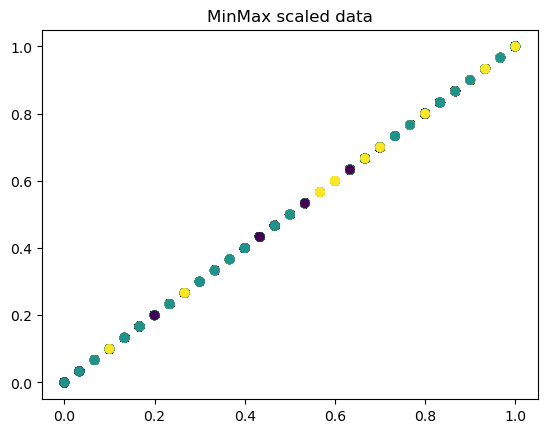

In [407]:
fig, axes = plt.subplots(1,1)

axes.scatter(df['geo_level_1_id'],df['geo_level_1_id'], c=label['damage_grade'])
axes.set_title("MinMax scaled data")
plt.show()

In [408]:
Normal=df['geo_level_2_id'].values.reshape(-1,1)
df['geo_level_2_id']=scaler.fit_transform(Normal)
df['geo_level_2_id']

0         0.341275
1         0.630694
2         0.254380
3         0.292922
4         0.091801
            ...   
260596    0.935529
260597    0.501051
260598    0.035739
260599    0.027330
260600    0.006307
Name: geo_level_2_id, Length: 260601, dtype: float64

In [409]:
df['geo_level_2_id'].max()

1.0

In [410]:
df['geo_level_2_id'].min()

0.0

- In the above cell we are performing normalization on our numerical data using a method called as Min-Max notation which place a vital role in standardizing the given numerical data which makes it futher ready for  

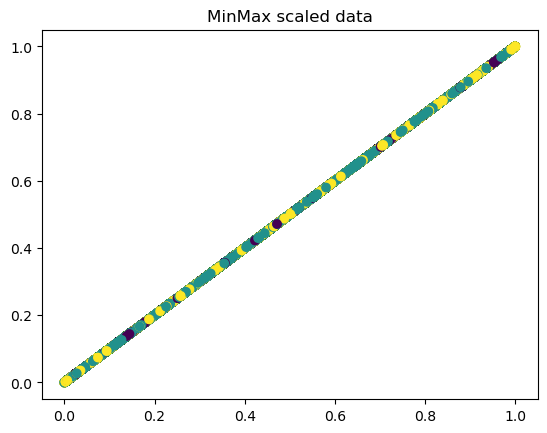

In [411]:
fig, axes = plt.subplots(1,1)

axes.scatter(df['geo_level_2_id'],df['geo_level_2_id'], c=label['damage_grade'])
axes.set_title("MinMax scaled data")
plt.show()

In [412]:
Normal=df['geo_level_3_id'].values.reshape(-1,1)
df['geo_level_3_id']=scaler.fit_transform(Normal)
df['geo_level_3_id']

0         0.970637
1         0.223761
2         0.714013
3         0.850959
4         0.118405
            ...   
260596    0.128989
260597    0.163921
260598    0.649558
260599    0.147291
260600    0.724198
Name: geo_level_3_id, Length: 260601, dtype: float64

In [413]:
df['geo_level_3_id'].max()

1.0

In [414]:
df['geo_level_3_id'].min()

0.0

- In the above cell we are performing normalization on our numerical data using a method called as Min-Max notation which place a vital role in standardizing the given numerical data which makes it futher ready for  

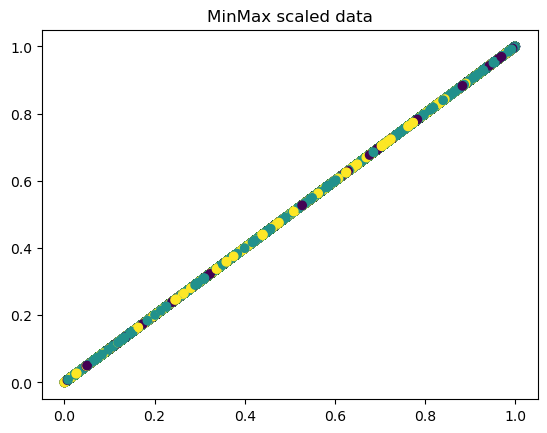

In [415]:
fig, axes = plt.subplots(1,1)

axes.scatter(df['geo_level_3_id'],df['geo_level_3_id'], c=label['damage_grade'])
axes.set_title("MinMax scaled data")
plt.show()

## Visualization

- Visualization is a powerful technique used to represent complex data in a visually compelling and intuitive manner. By converting raw information into graphical or interactive displays, visualization enhances data comprehension and facilitates pattern recognition, trends, and insights. Through charts, graphs, maps, and other visual elements, it allows users to explore large datasets, identify correlations, and communicate findings effectively. Visualization also enables the presentation of data-driven narratives, making it an indispensable tool for researchers, analysts, and decision-makers across various domains. Whether used for exploratory analysis, reporting, or storytelling, visualization plays a crucial role in conveying information, simplifying complexity, and empowering data-driven decision-making processes.

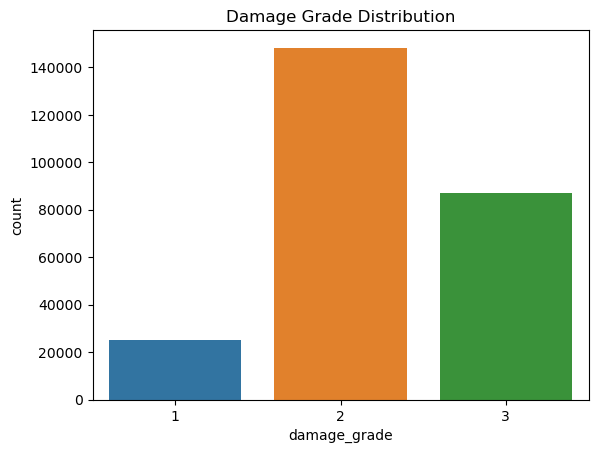

In [416]:
sns.countplot(x="damage_grade", data=label)
plt.title("Damage Grade Distribution")
plt.show()

### Info
- The damage grade tell us in which damage category the building's lie and is given by the count and the damage grade it is a target value

## Hypothesis:1


### Among the building's floors, which ones sustained the highest level of damage?

C:\Users\chand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


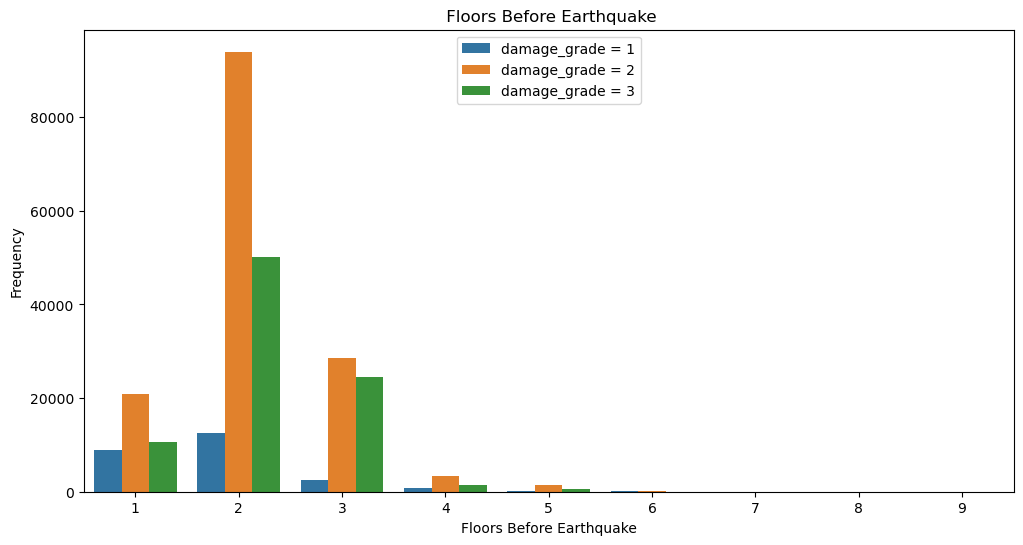

In [417]:
plt.figure(figsize=(12,6))
sns.countplot(df["count_floors_pre_eq"], hue=label["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Floors Before Earthquake")

plt.title(" Floors Before Earthquake")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

## Inference
- The above histogram tell us the range of buildings having different floors before the earthquake and the damage grade they were consider after the earthquake the most damage was taken by the building of second and third floor

## Hypothesis:2


### Does the age of a building play's a role in determining the amount of damage it is likely to experience?

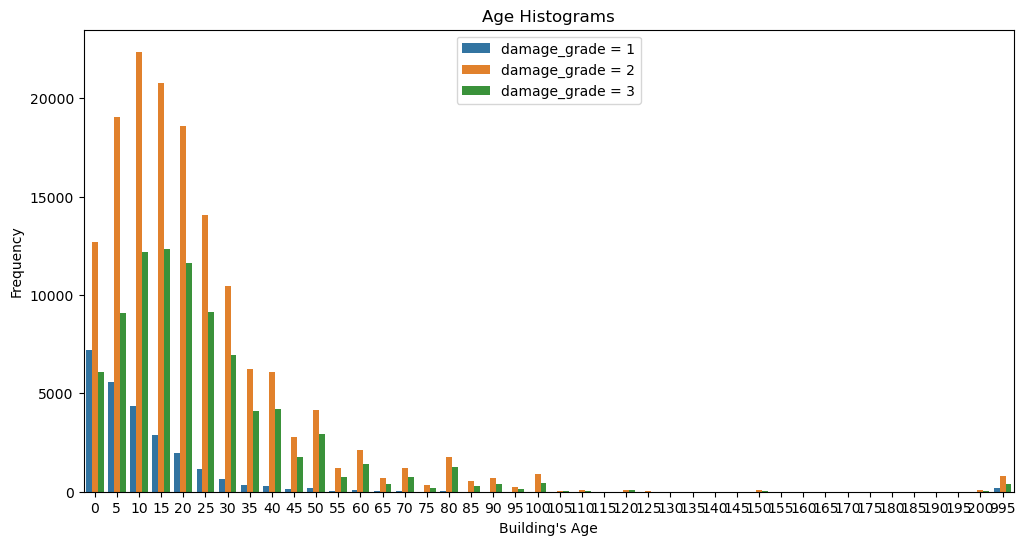

In [418]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["age"],hue=label["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Building's Age")
plt.title("Age Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

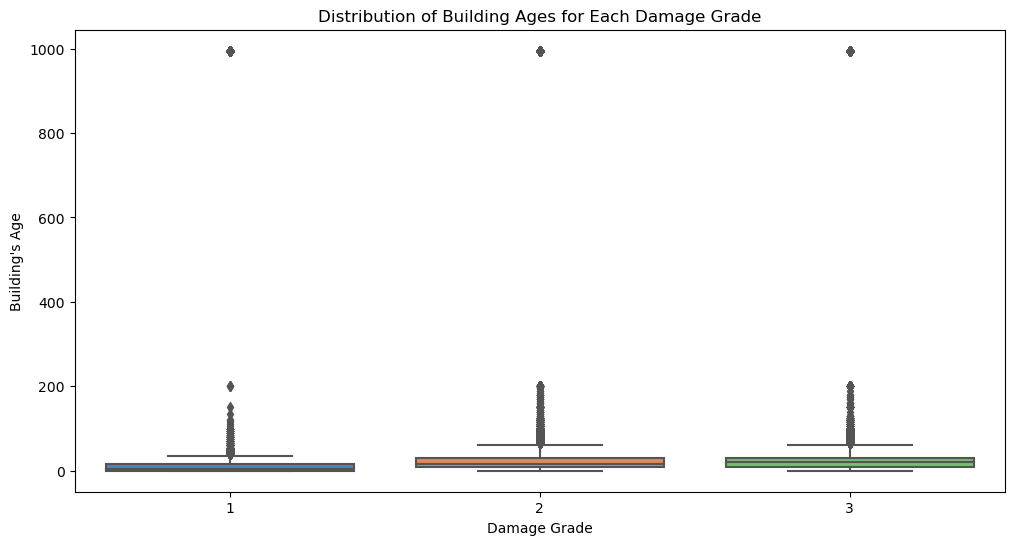

In [419]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=label["damage_grade"], y=df["age"], data=df, palette="muted")
plt.xlabel("Damage Grade")
plt.ylabel("Building's Age")
plt.title("Distribution of Building Ages for Each Damage Grade")
plt.show()

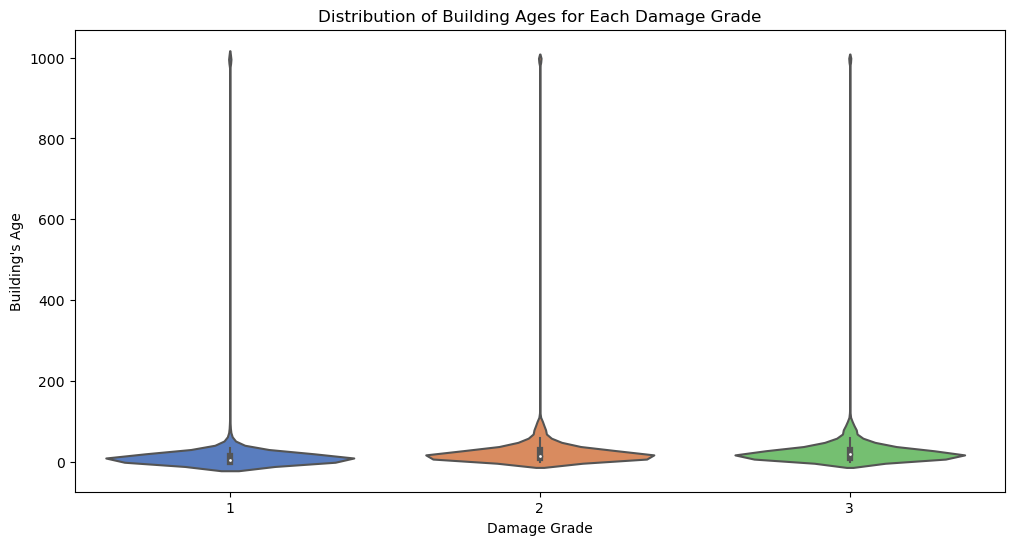

In [420]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=label["damage_grade"], y=df["age"], data=df, palette="muted")
plt.xlabel("Damage Grade")
plt.ylabel("Building's Age")
plt.title("Distribution of Building Ages for Each Damage Grade")
plt.show()

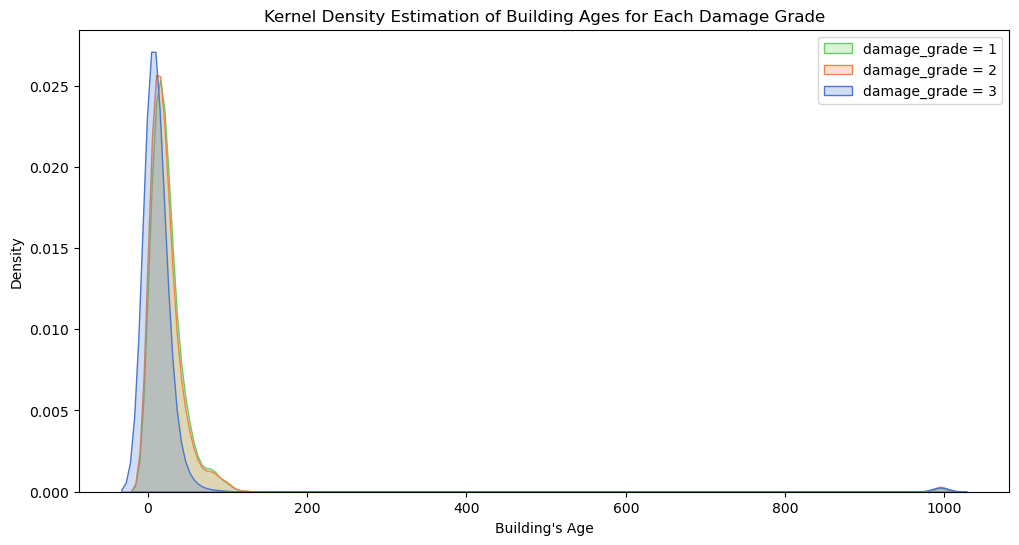

In [421]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x=df["age"], hue=label["damage_grade"], fill=True, common_norm=False, palette="muted")
plt.xlabel("Building's Age")
plt.title("Kernel Density Estimation of Building Ages for Each Damage Grade")
plt.legend(["damage_grade = 1", "damage_grade = 2", "damage_grade = 3"])
plt.show()


## Inferences
- The Above graphs are  telling us that this feature age  has many outliers and preprocessing is required in order to infer more 

<AxesSubplot:xlabel='age'>

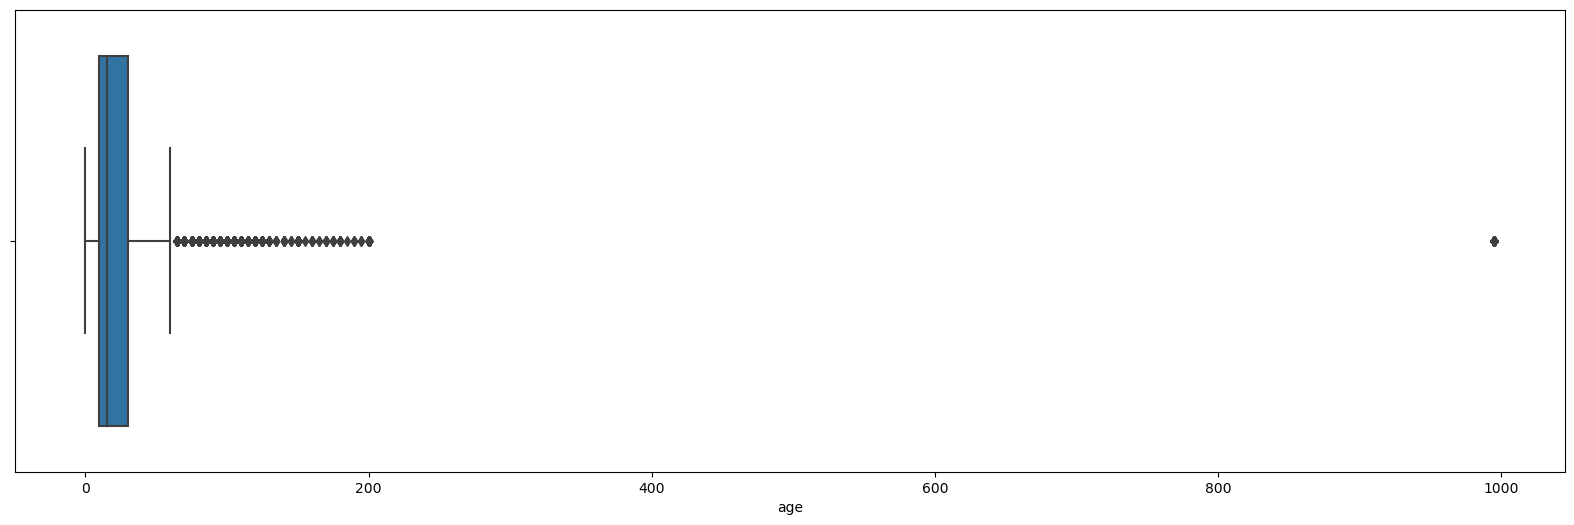

In [422]:
plt.figure(figsize=(20,6))
sns.boxplot(data = df, x = "age")


# Handling the outliers

In [423]:
df=df[df['age']<300]


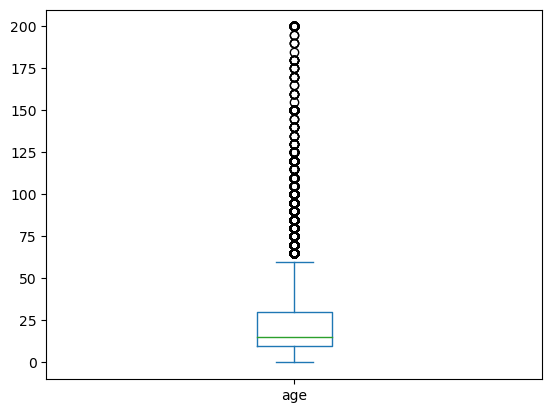

In [424]:
df.age.plot.box()
plt.show()

In [425]:
df.shape

(259211, 40)

## Inference 
- We identified the outliers there were building's ranging from a age of 1 to 1000 and we have seen from earlier visualization that the building after the age of 300 are sure they will damage from earth quake as a preprocessing we are removing the samples which are ranging in the age group above 300

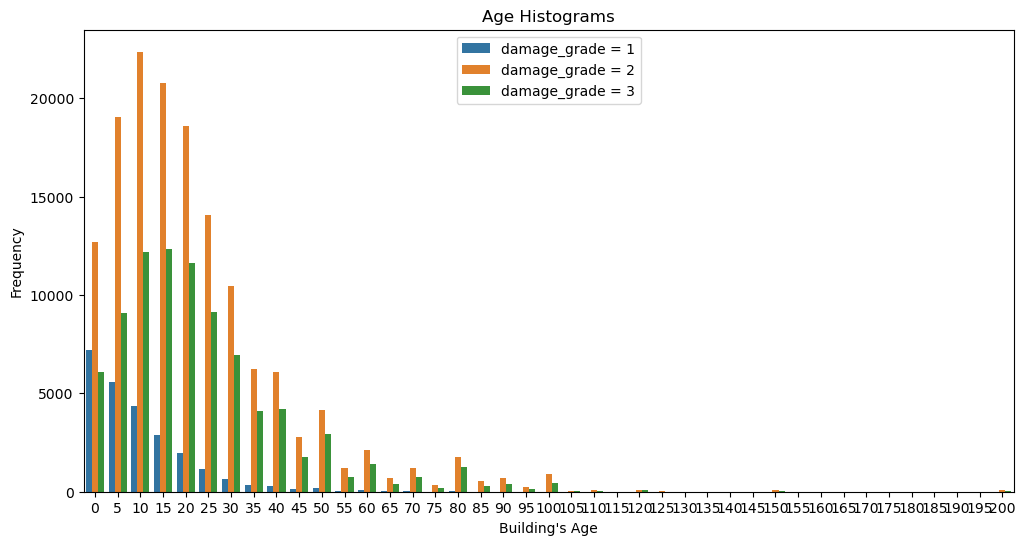

In [426]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["age"],hue=label["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Building's Age")
plt.title("Age Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

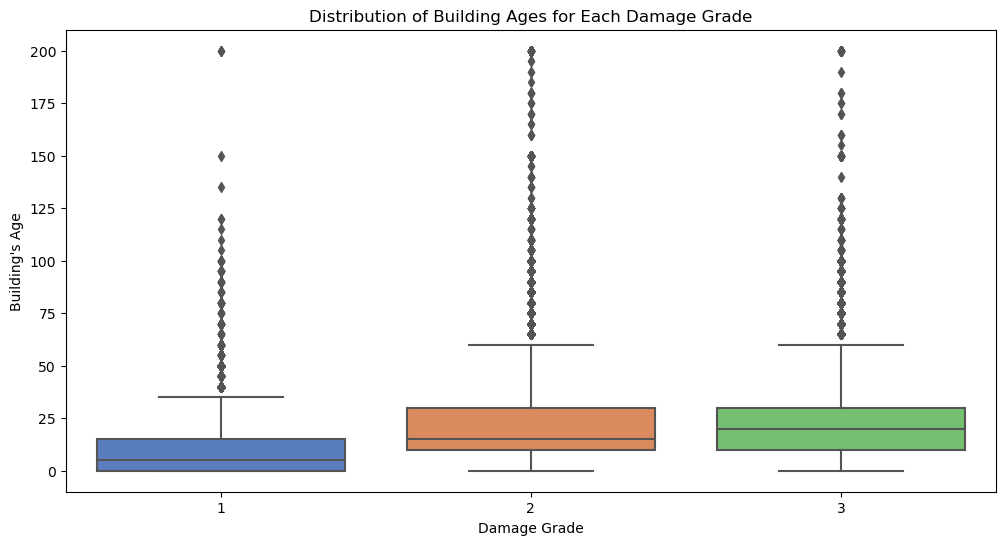

In [427]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=label["damage_grade"], y=df["age"], data=df, palette="muted")
plt.xlabel("Damage Grade")
plt.ylabel("Building's Age")
plt.title("Distribution of Building Ages for Each Damage Grade")
plt.show()

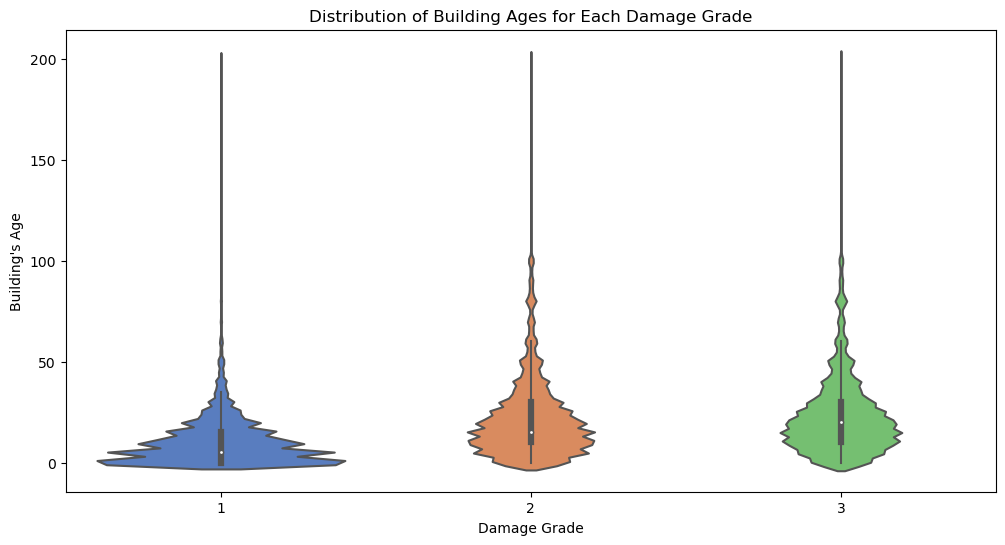

In [428]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=label["damage_grade"], y=df["age"], data=df, palette="muted")
plt.xlabel("Damage Grade")
plt.ylabel("Building's Age")
plt.title("Distribution of Building Ages for Each Damage Grade")
plt.show()

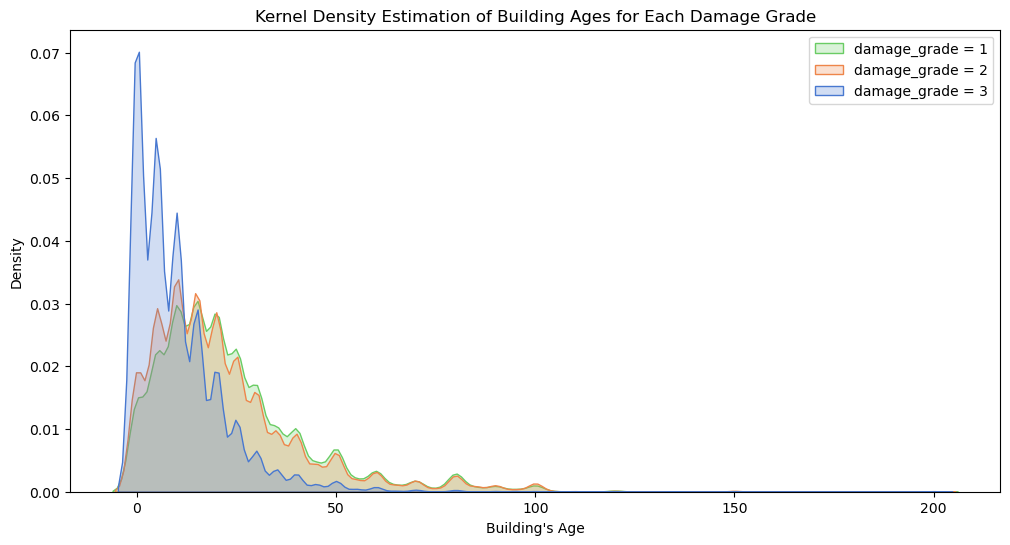

In [429]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x=df["age"], hue=label["damage_grade"], fill=True, common_norm=False, palette="muted")
plt.xlabel("Building's Age")
plt.title("Kernel Density Estimation of Building Ages for Each Damage Grade")
plt.legend(["damage_grade = 1", "damage_grade = 2", "damage_grade = 3"])
plt.show()


## Inferences
- After preprocessing we found out that as the age goes on increasing the building are prone to get damage in earthquake and they are sure to be damaged

## Hypothesis:3



### What parts of the building, in terms of its area footprint and height footprint, suffered the greatest impact from the earthquake?

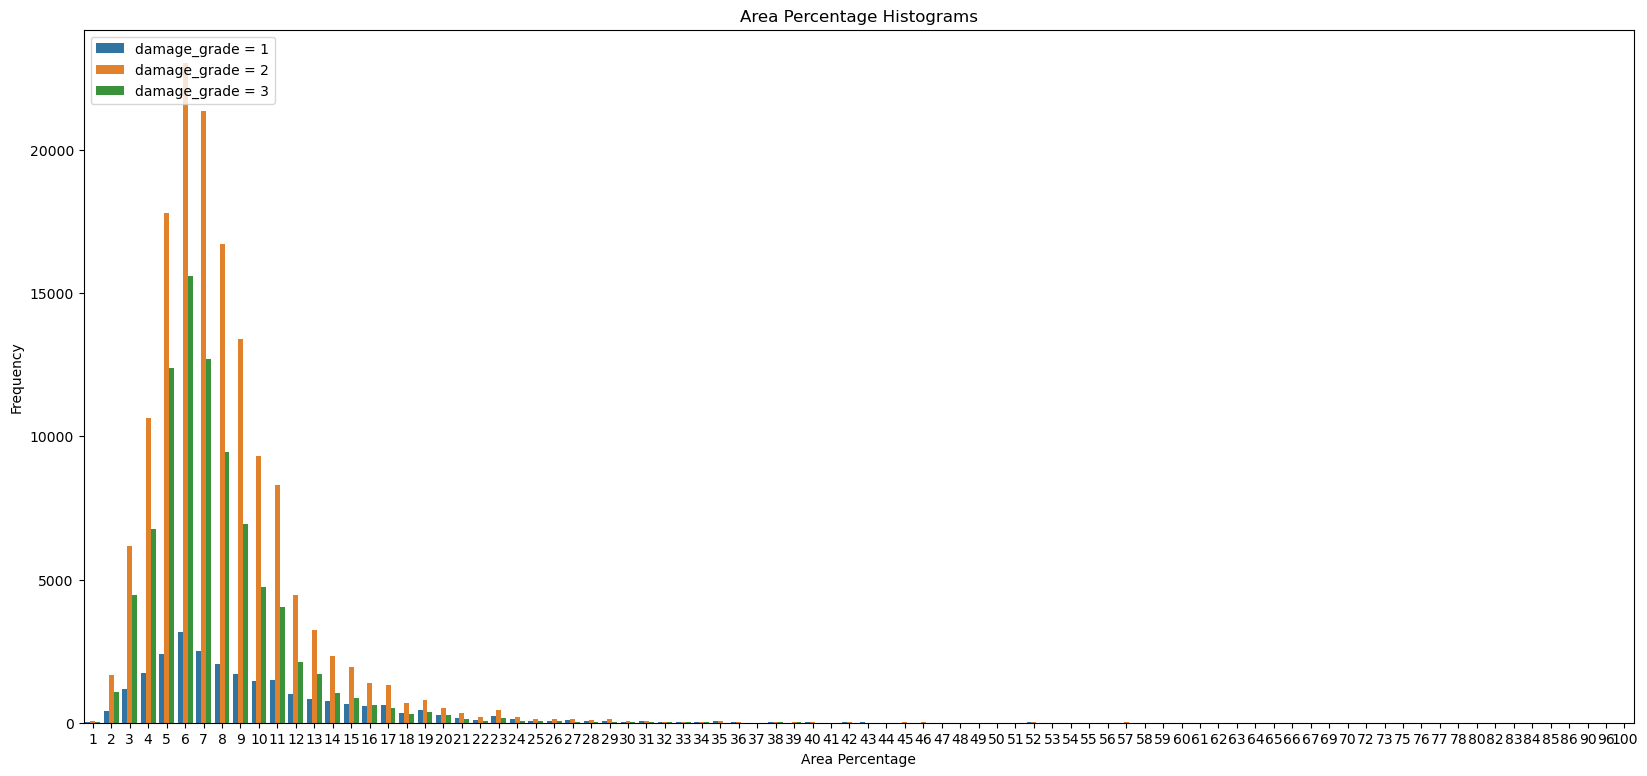

In [430]:
plt.figure(figsize=(20,9))
sns.countplot(x=df["area_percentage"],hue=label["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Area Percentage")
plt.title("Area Percentage Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

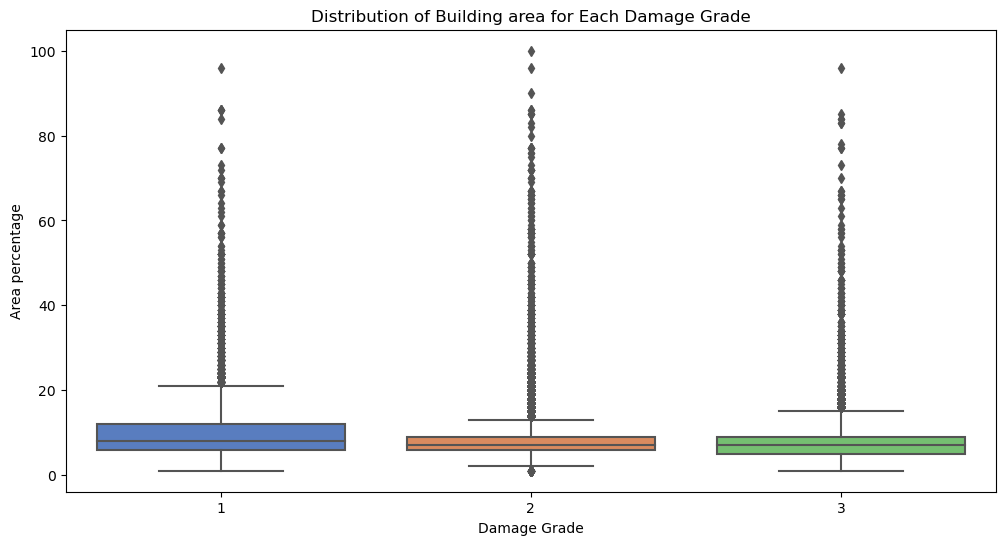

In [431]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=label["damage_grade"], y=df["area_percentage"], data=df, palette="muted")
plt.xlabel("Damage Grade")
plt.ylabel("Area percentage")
plt.title("Distribution of Building area for Each Damage Grade")
plt.show()

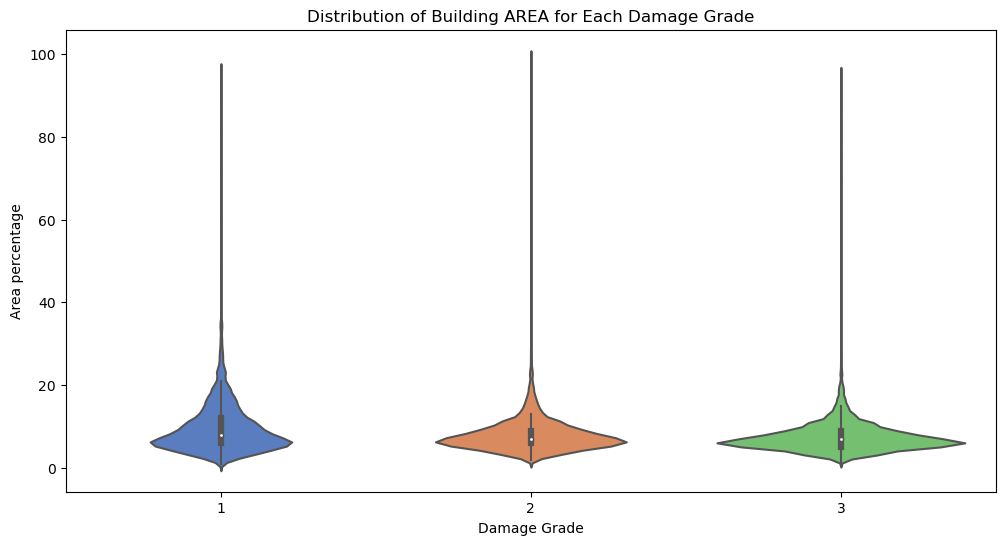

In [432]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=label["damage_grade"], y=df["area_percentage"], data=df, palette="muted")
plt.xlabel("Damage Grade")
plt.ylabel("Area percentage")
plt.title("Distribution of Building AREA for Each Damage Grade")
plt.show()

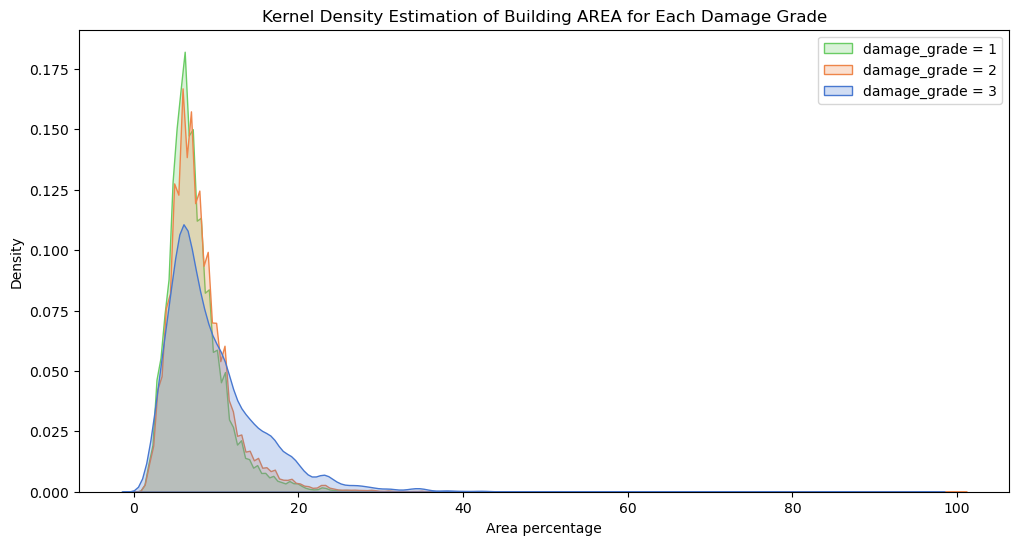

In [433]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x=df["area_percentage"], hue=label["damage_grade"], fill=True, common_norm=False, palette="muted")
plt.xlabel("Area percentage")
plt.title("Kernel Density Estimation of Building AREA for Each Damage Grade")
plt.legend(["damage_grade = 1", "damage_grade = 2", "damage_grade = 3"])
plt.show()


<AxesSubplot:xlabel='area_percentage'>

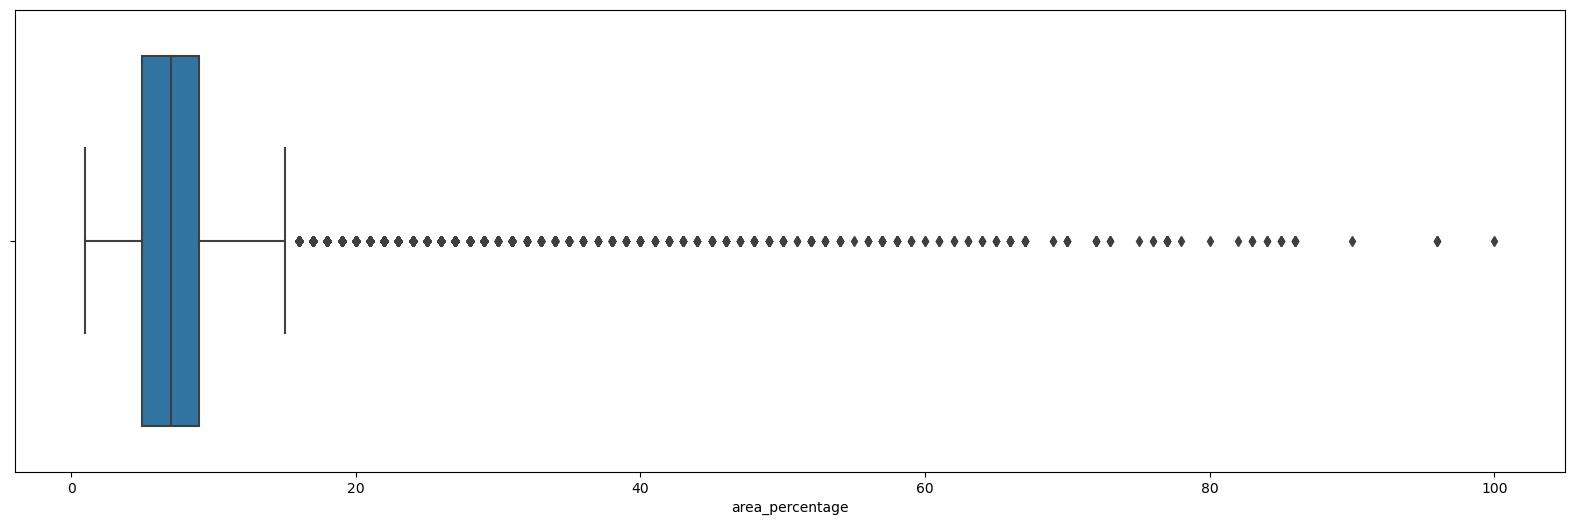

In [434]:
plt.figure(figsize=(20,6))
sns.boxplot(data = df, x = "area_percentage")

## Inference
- Above  graphs about area percentage cannot tell consist of many outliers and those has to be dealt first in order to get answer to our hypothesis

# Handling the outliers

In [435]:
df=df[df['area_percentage']<60]

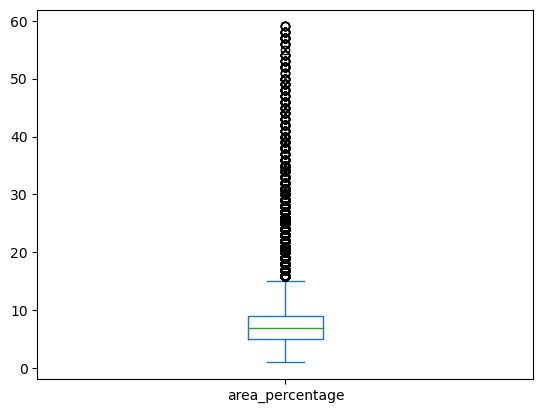

In [436]:
df.area_percentage.plot.box()
plt.show()

In [437]:
df.shape

(259119, 40)

## Inferences

- As we had seen there were outliers and from the box plot we understood that the outliers were in the range of 20 to 100
  where in we are assuming that those buliding above 60 are commerical building which are less in number compare to those that are below the range of 60.Hence we are only considering the building whose are range is below 60 

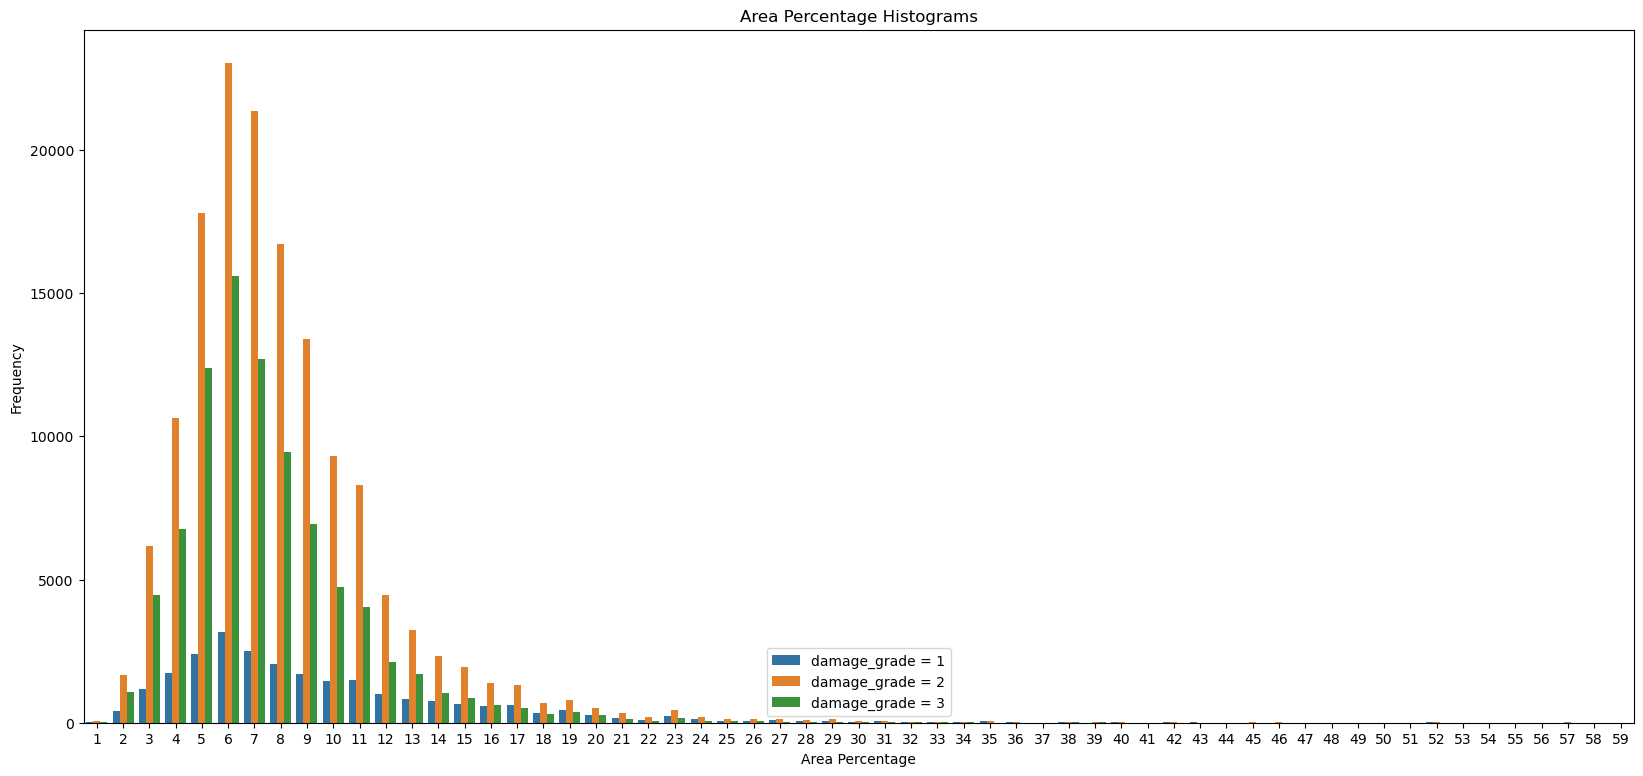

In [438]:
plt.figure(figsize=(20,9))
sns.countplot(x=df["area_percentage"],hue=label["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Area Percentage")
plt.title("Area Percentage Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

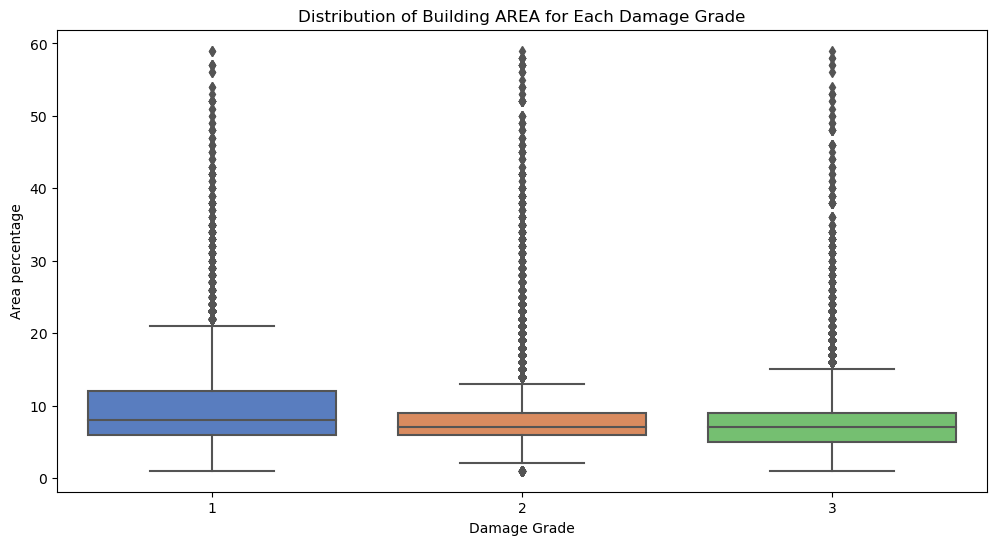

In [439]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=label["damage_grade"], y=df["area_percentage"], data=df, palette="muted")
plt.xlabel("Damage Grade")
plt.ylabel("Area percentage")
plt.title("Distribution of Building AREA for Each Damage Grade")
plt.show()

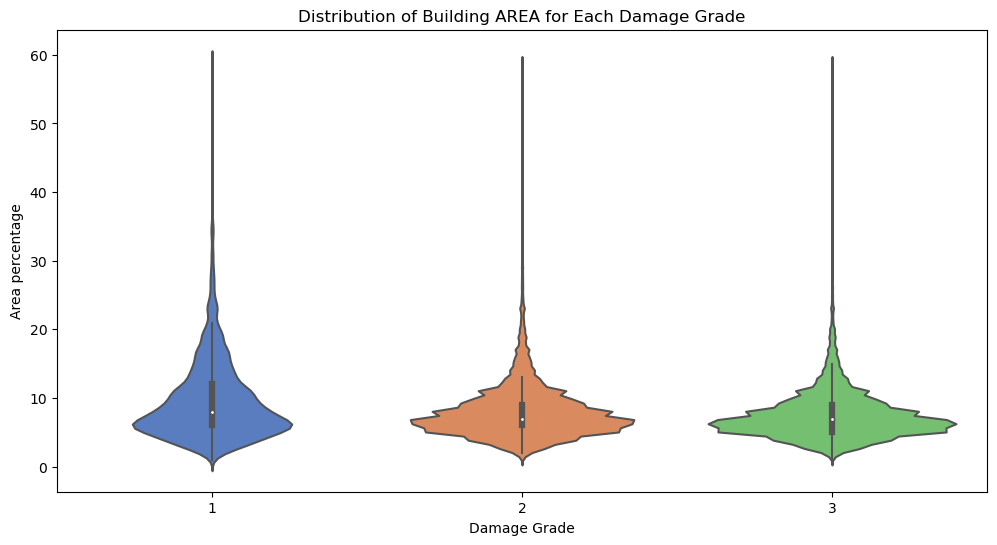

In [440]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=label["damage_grade"], y=df["area_percentage"], data=df, palette="muted")
plt.xlabel("Damage Grade")
plt.ylabel("Area percentage")
plt.title("Distribution of Building AREA for Each Damage Grade")
plt.show()

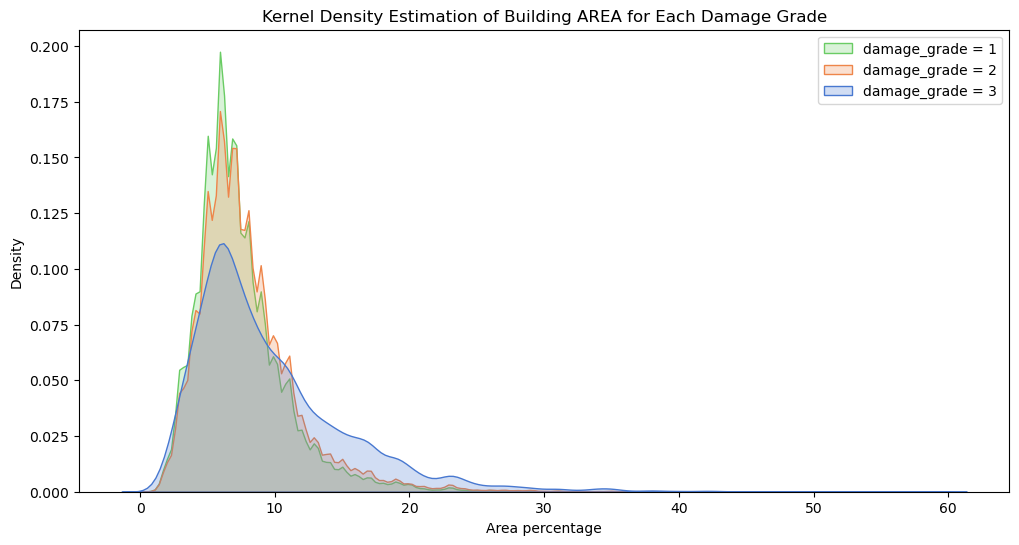

In [441]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x=df["area_percentage"], hue=label["damage_grade"], fill=True, common_norm=False, palette="muted")
plt.xlabel("Area percentage")
plt.title("Kernel Density Estimation of Building AREA for Each Damage Grade")
plt.legend(["damage_grade = 1", "damage_grade = 2", "damage_grade = 3"])
plt.show()


## Inferences
- From the above graph we see that as as the area of the building in the range 4 to 20 infer more damage and we see that area increase the possibilty of getting damaged also reduces

## Hypothesis 4:


### What parts of the building, in terms of its area footprint and height footprint, suffered the greatest impact from the earthquake?

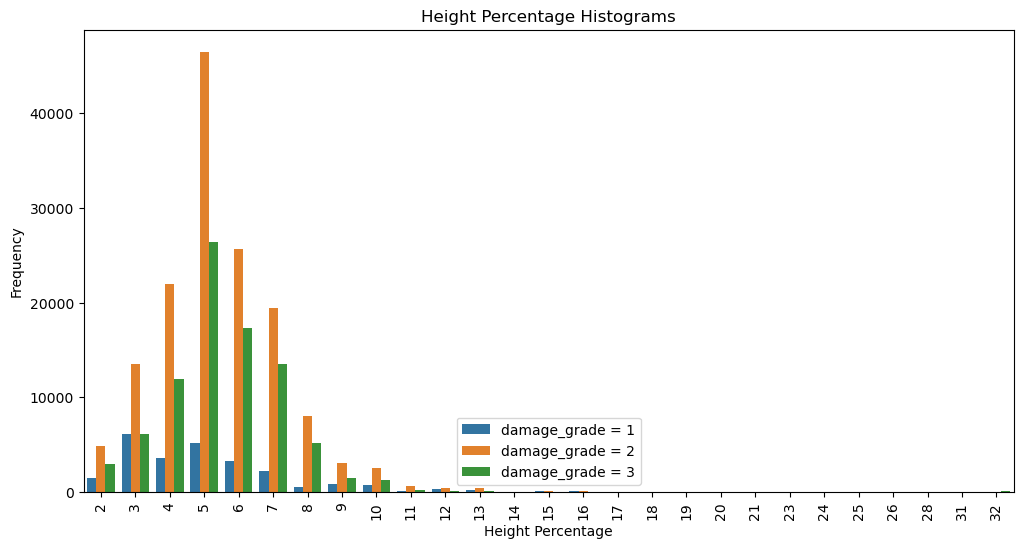

In [442]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["height_percentage"],hue=label["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Height Percentage")
plt.xticks(rotation=90)
plt.title("Height Percentage Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

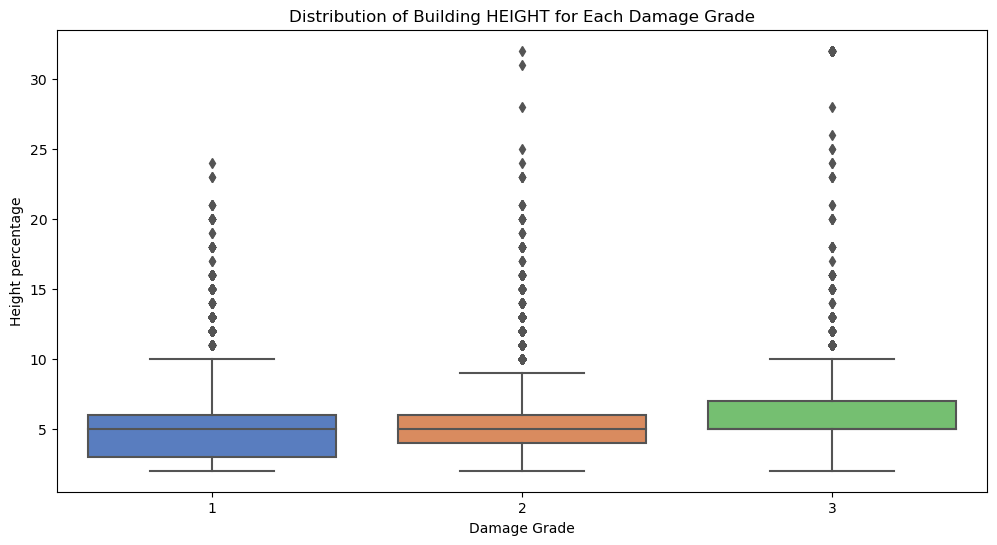

In [443]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=label["damage_grade"], y=df["height_percentage"], data=df, palette="muted")
plt.xlabel("Damage Grade")
plt.ylabel("Height percentage")
plt.title("Distribution of Building HEIGHT for Each Damage Grade")
plt.show()

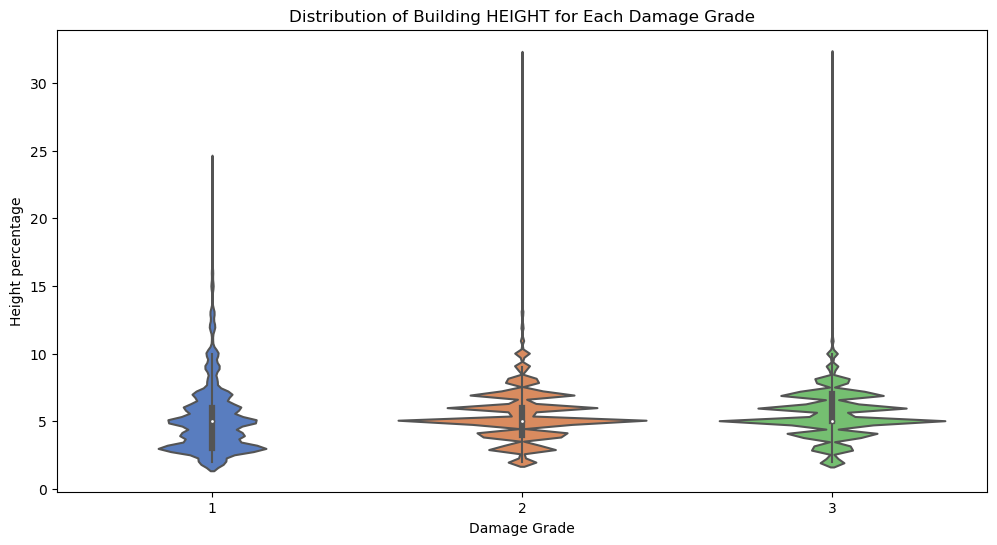

In [444]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=label["damage_grade"], y=df["height_percentage"], data=df, palette="muted")
plt.xlabel("Damage Grade")
plt.ylabel("Height percentage")
plt.title("Distribution of Building HEIGHT for Each Damage Grade")
plt.show()

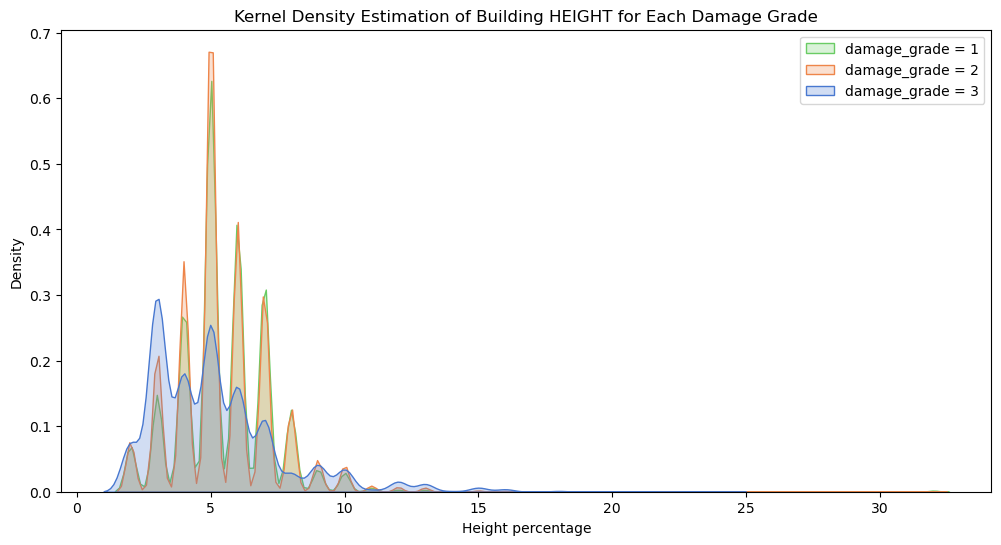

In [445]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x=df["height_percentage"], hue=label["damage_grade"], fill=True, common_norm=False, palette="muted")
plt.xlabel("Height percentage")
plt.title("Kernel Density Estimation of Building HEIGHT for Each Damage Grade")
plt.legend(["damage_grade = 1", "damage_grade = 2", "damage_grade = 3"])
plt.show()


<AxesSubplot:xlabel='height_percentage'>

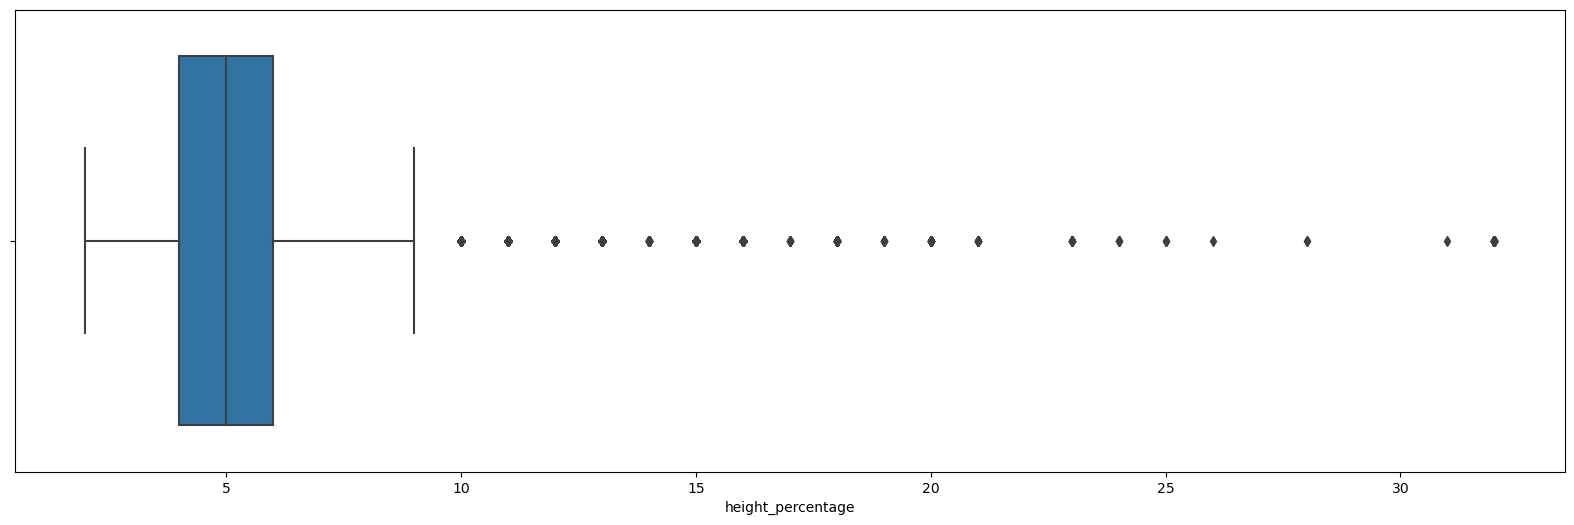

In [446]:
plt.figure(figsize=(20,6))
sns.boxplot(data = df, x = "height_percentage")

## Inferences
- Above  graphs about height percentage cannot tell consist of many outliers and those has to be dealt first in order to get answer to our hypothesis

# Handling the outliers

In [447]:
df=df[df['height_percentage']<22]

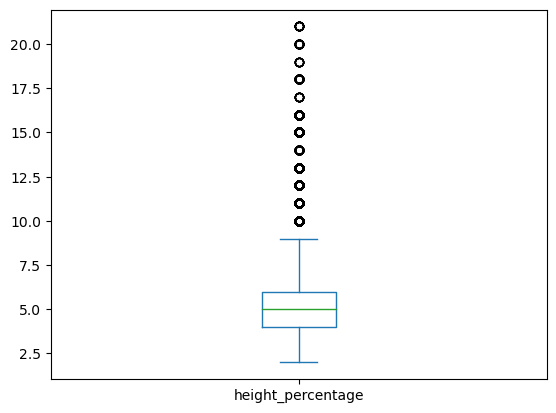

In [448]:
df.height_percentage.plot.box()
plt.show()

## Inferences
- From the above graph we see that we have many outliers and we see that there building ranging from 1 to 100 and we see the most outliers from 20 to 100 so assuming that the outliers which are above are less in number we remove the samples which are ranging above 22

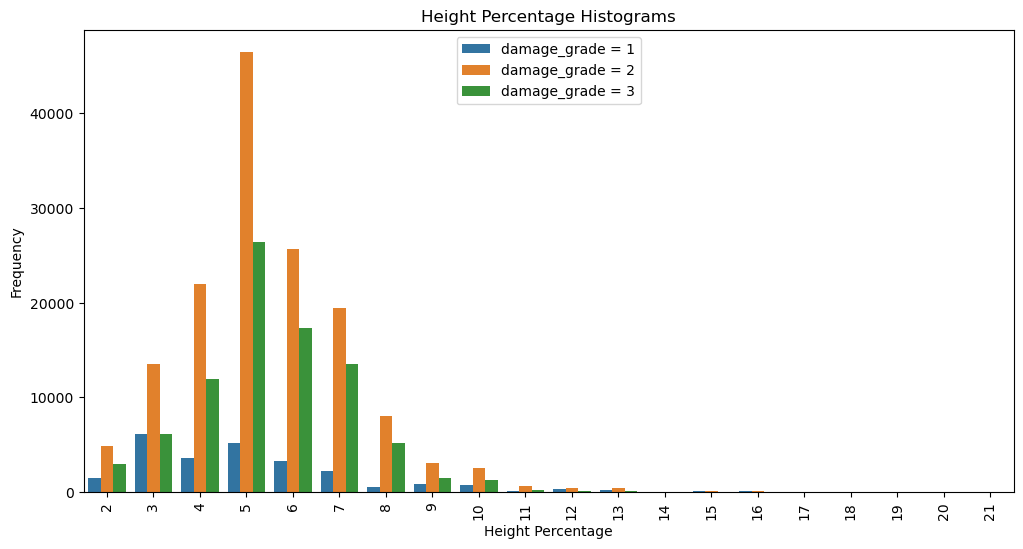

In [449]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["height_percentage"],hue=label["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Height Percentage")
plt.xticks(rotation=90)
plt.title("Height Percentage Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

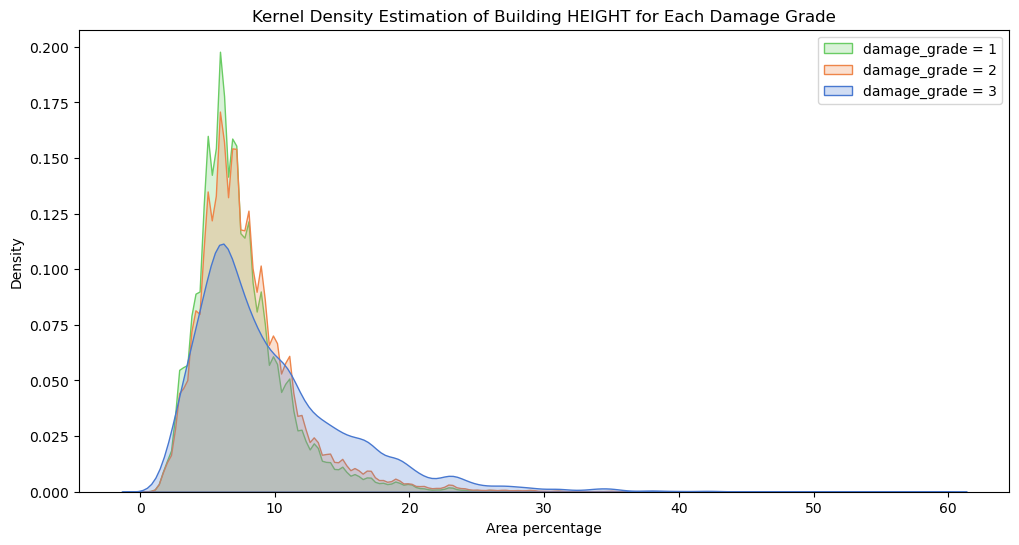

In [450]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x=df["area_percentage"], hue=label["damage_grade"], fill=True, common_norm=False, palette="muted")
plt.xlabel("Area percentage")
plt.title("Kernel Density Estimation of Building HEIGHT for Each Damage Grade")
plt.legend(["damage_grade = 1", "damage_grade = 2", "damage_grade = 3"])
plt.show()


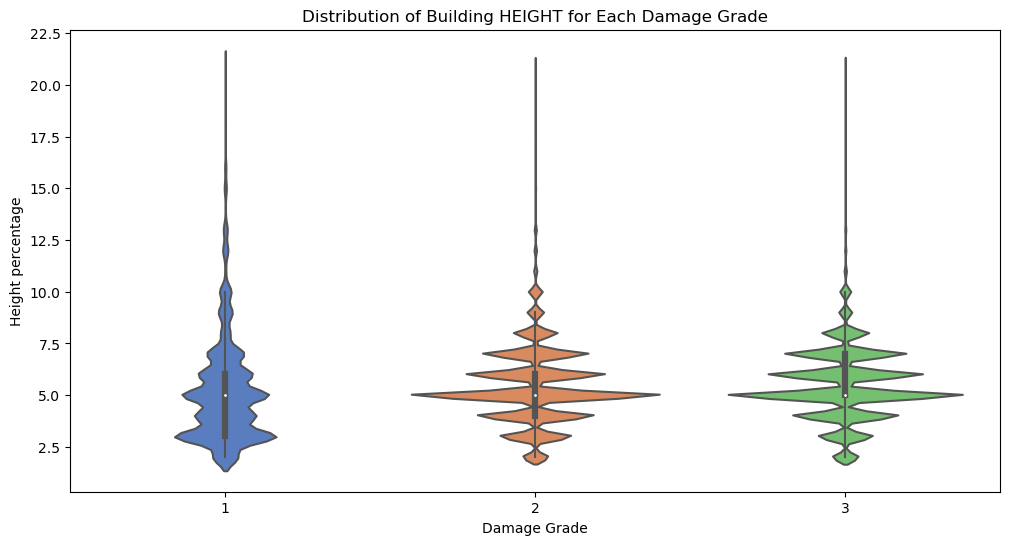

In [451]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=label["damage_grade"], y=df["height_percentage"], data=df, palette="muted")
plt.xlabel("Damage Grade")
plt.ylabel("Height percentage")
plt.title("Distribution of Building HEIGHT for Each Damage Grade")
plt.show()

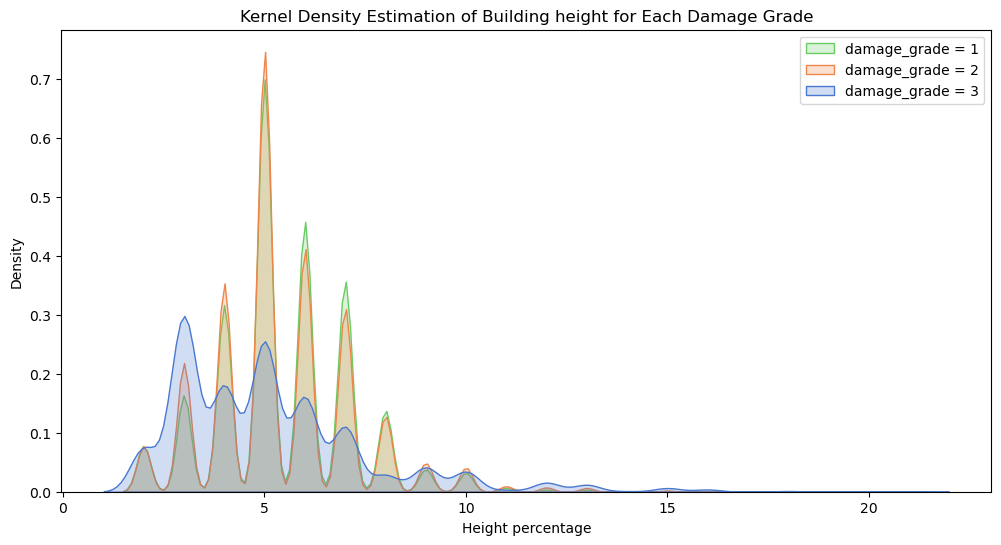

In [452]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x=df["height_percentage"], hue=label["damage_grade"], fill=True, common_norm=False, palette="muted")
plt.xlabel("Height percentage")
plt.title("Kernel Density Estimation of Building height for Each Damage Grade")
plt.legend(["damage_grade = 1", "damage_grade = 2", "damage_grade = 3"])
plt.show()


## Inferences
- From the above graph we found out that as the height increase the chance of damage also increase and the most damage is seen in the building in the height range of 1 to 10

## Hypothesis 4:


### Which ground types were most susceptible to causing significant damage to the buildings?

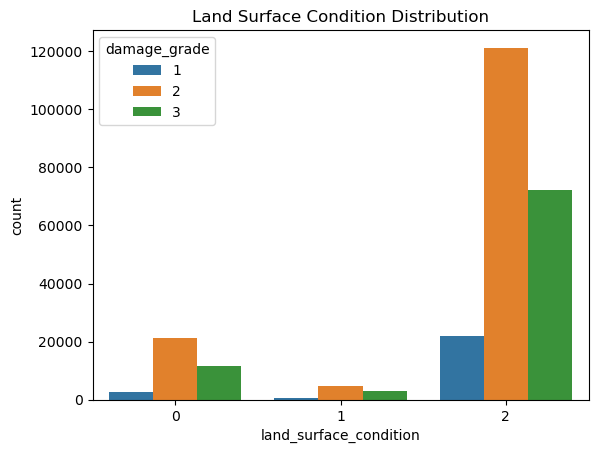

In [453]:
sns.countplot(x = df["land_surface_condition"], hue = label["damage_grade"])
plt.title("Land Surface Condition Distribution")
plt.show()

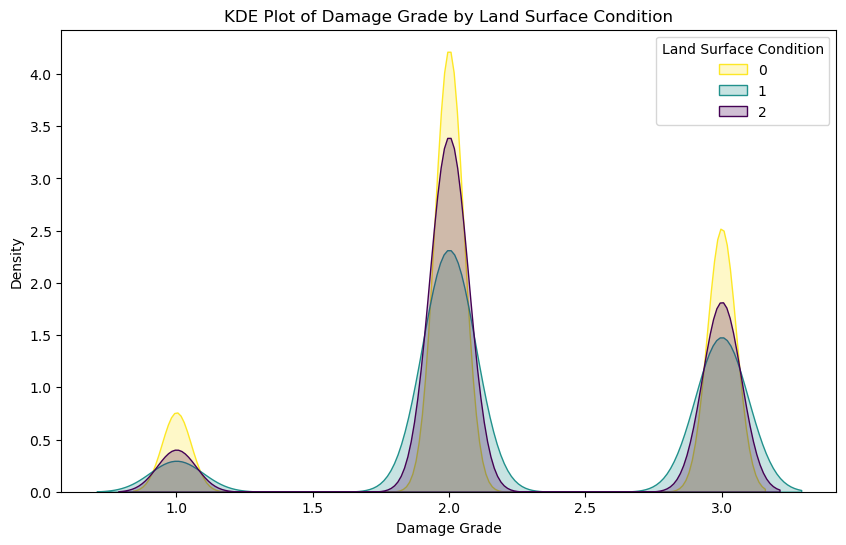

In [454]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["land_surface_condition"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Land Surface Condition")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Land Surface Condition", bbox_to_anchor=(1, 1),labels=[0,1,2])
plt.show()


## Inferennces
- We can see that from the above graph the Land surface type 2 has been infered more damage compare to other two land surface condition which tell us we should try to reduce the use of type 2 land for constructing buildings

## Hypothesis 5:

### To what extent did the building's foundation either alleviate or contribute to the damage incurred?

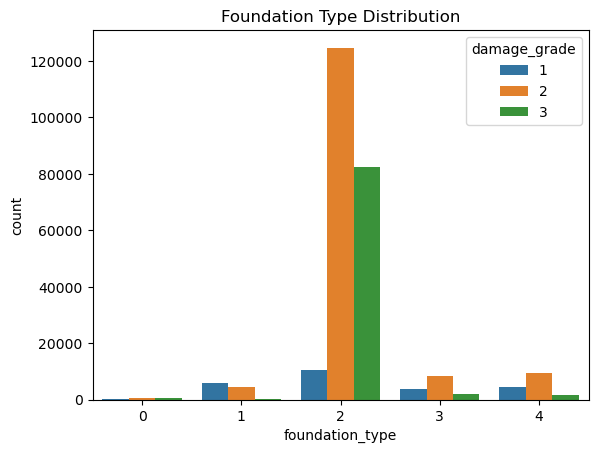

In [455]:
sns.countplot(x = df["foundation_type"], hue = label["damage_grade"])
plt.title("Foundation Type Distribution")
plt.show()

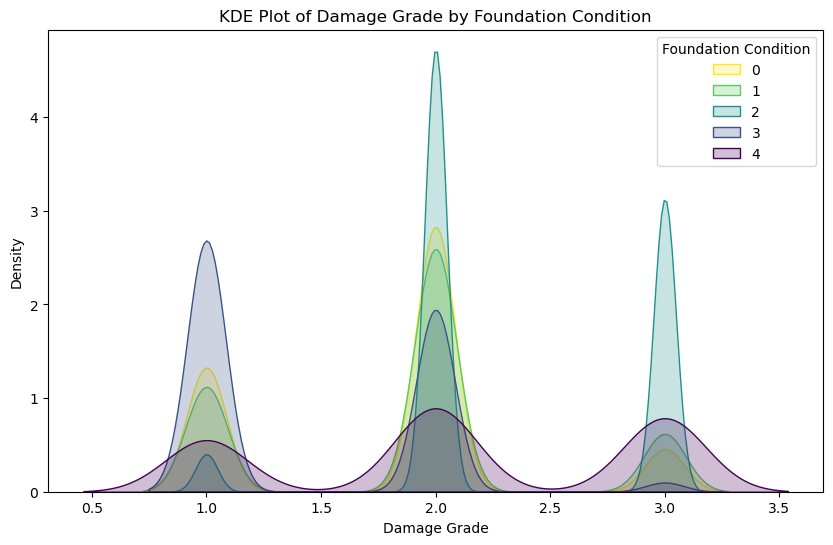

In [456]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["foundation_type"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Foundation Condition")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Foundation Condition", bbox_to_anchor=(1, 1),labels=[0,1,2,3,4])
plt.show()


## Inferences
- From the above graph we see that the building which were having the foundation type 2 were damaged the most in the earth quake compare to others which tells us that foundation type 2 are not earthquake proof  

## Hypothesis 5:


### Was the roof of the building a primary factor in the extent of the damage?

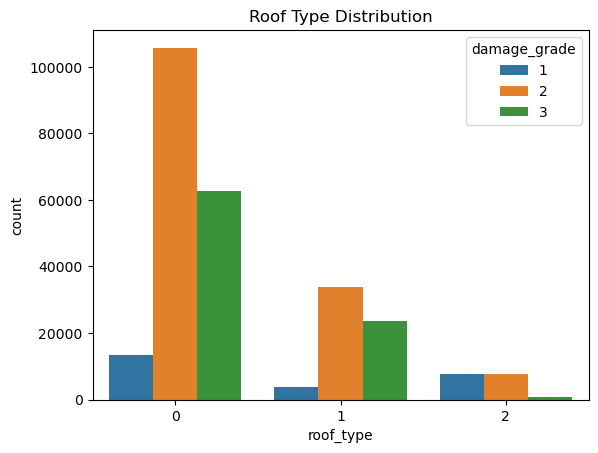

In [457]:
sns.countplot(x = df["roof_type"], hue = label["damage_grade"])
plt.title("Roof Type Distribution")
plt.show()

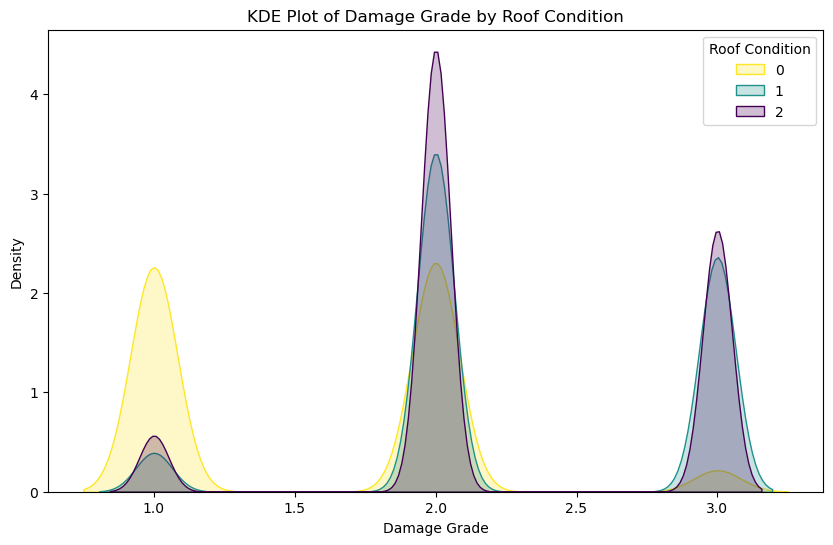

In [458]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["roof_type"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Roof Condition")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Roof Condition", bbox_to_anchor=(1, 1),labels=[0,1,2])
plt.show()


## Inference
- From the above graph we see that roof type 0 was affected more to damage grade 1 and in case of damage grade 2 roof type 2 was affected the more so from the above graph it was clear roofs are affected by earthquake but they depends on the damage grade 

## Hypothesis 6:


### Is there a correlation between the type of ground floor and the flooring materials used in other levels of the building?

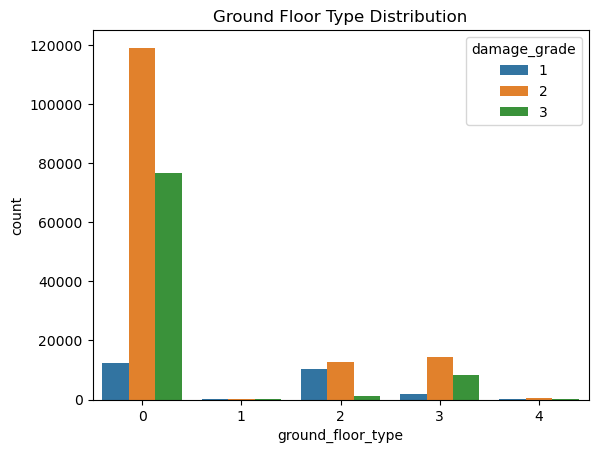

In [459]:
sns.countplot(x = df["ground_floor_type"], hue = label["damage_grade"])
plt.title("Ground Floor Type Distribution")
plt.show()

## Inference
- We see that ground floor type 0 is affected the more in earthquake compared to that other ground type

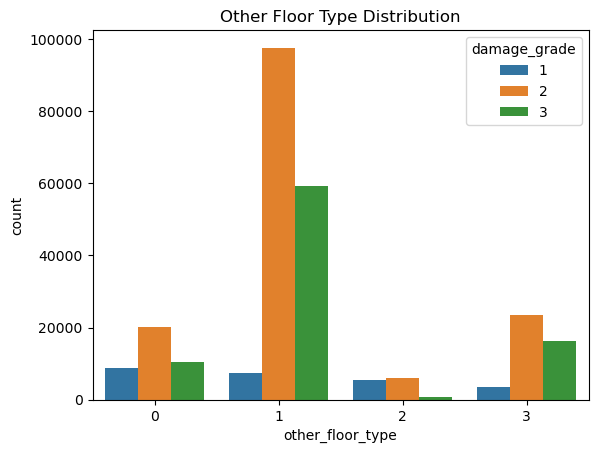

In [460]:
sns.countplot(x = df["other_floor_type"], hue = label["damage_grade"])
plt.title("Other Floor Type Distribution")
plt.show()

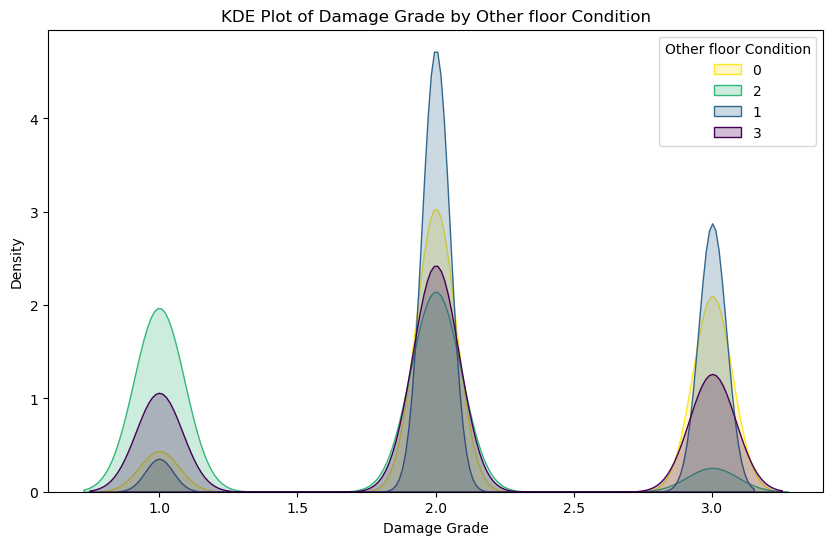

In [461]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["other_floor_type"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Other floor Condition")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Other floor Condition", bbox_to_anchor=(1, 1),labels=[0,2,1,3])
plt.show()


## Inference
- We see that in case of other floor we see that floor type 1 was affected the more in the earth quake

## Hypothesis 6:


### Is the positioning of the building a contributing factor to the damage it inflicts upon itself?

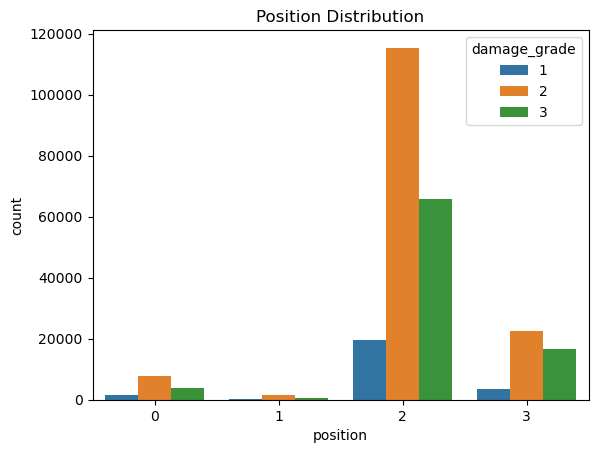

In [462]:
sns.countplot(x = df["position"], hue = label["damage_grade"])
plt.title("Position Distribution")
plt.show()

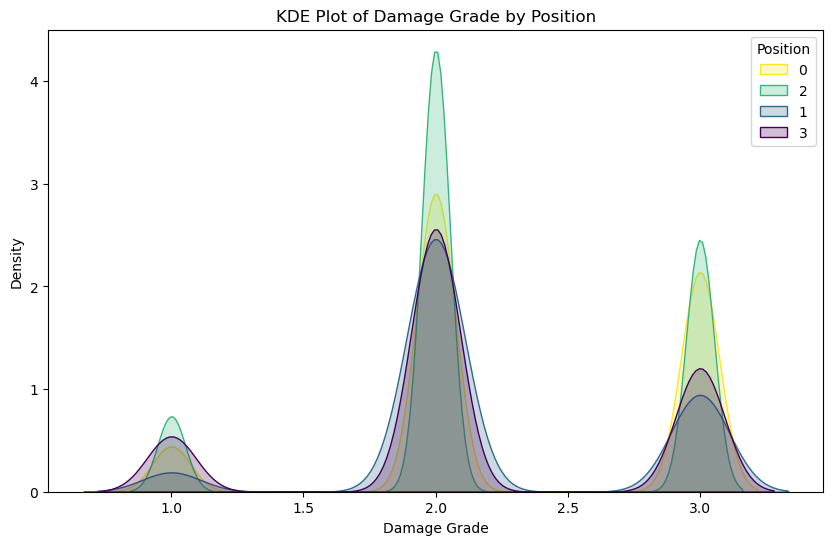

In [463]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["position"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Position")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Position", bbox_to_anchor=(1, 1),labels=[0,2,1,3])
plt.show()


## Inferences
- We see that the buildings which were in the position type 2 were the one which were damaged the most in the earthquake

## Hypothesis 6:


### Is the choice of plan configuration a determining factor in the damage sustained by the building?

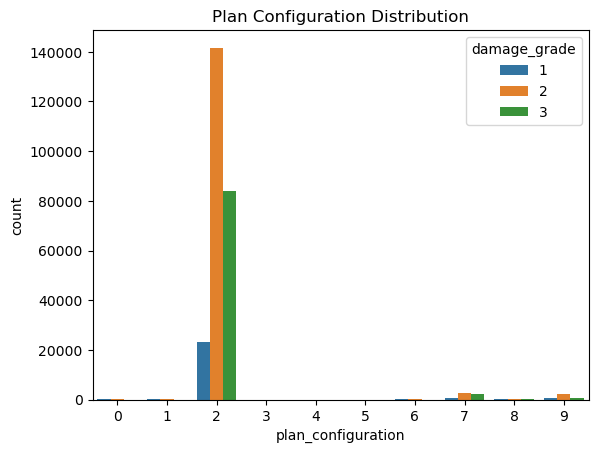

In [464]:
sns.countplot(x = df["plan_configuration"], hue = label["damage_grade"])
plt.title("Plan Configuration Distribution")
plt.show()

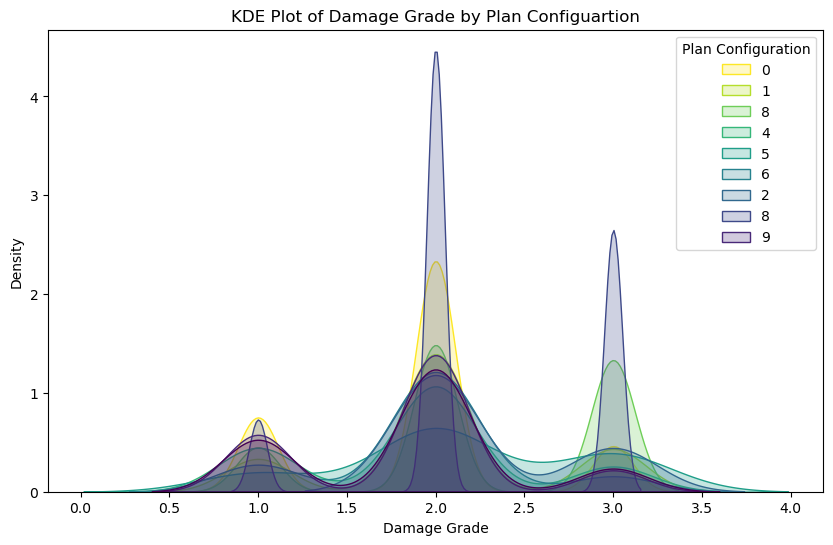

In [465]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["plan_configuration"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Plan Configuartion")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Plan Configuration", bbox_to_anchor=(1, 1),labels=[0,1,8,4,5,6,2,8,9])
plt.show()


## Inferences
- From the above graph we see that the building which were build using type 2 plan were affected the most in the earthquake

## Hypothesis 7:


### Which binary feature has more co relation towards damage grade

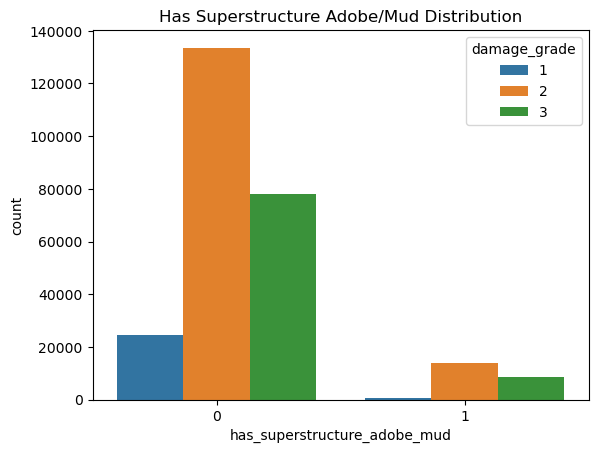

In [466]:
sns.countplot(x = df["has_superstructure_adobe_mud"], hue = label["damage_grade"])
plt.title("Has Superstructure Adobe/Mud Distribution")
plt.show()

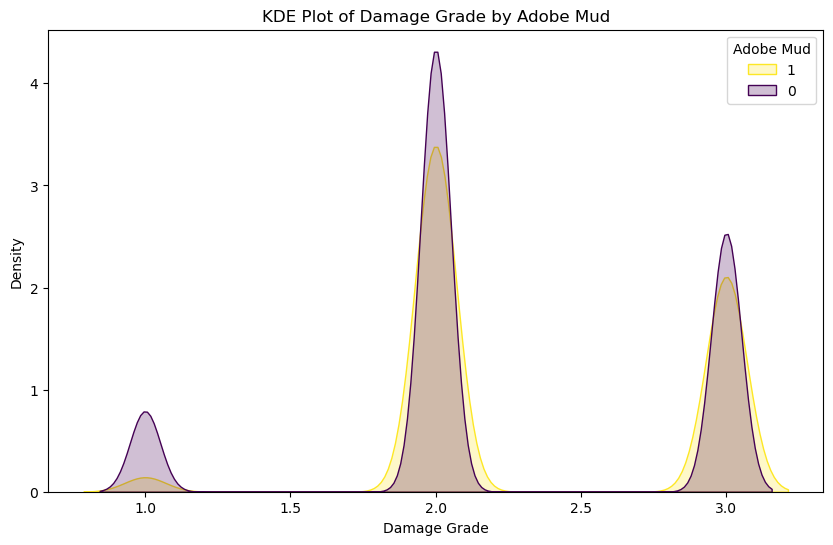

In [467]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_superstructure_adobe_mud"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Adobe Mud")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Adobe Mud", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()


## Inferences
- From the above graph we see that not most the houses were not made of mud and so they we were damaged but their percentage in whole is very small

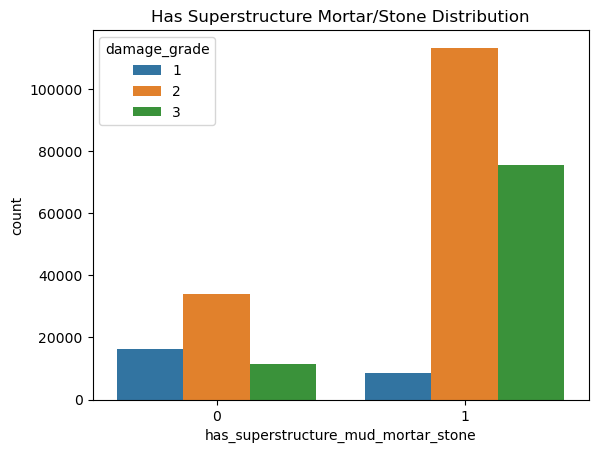

In [468]:
sns.countplot(x = df["has_superstructure_mud_mortar_stone"], hue = label["damage_grade"])
plt.title("Has Superstructure Mortar/Stone Distribution")
plt.show()

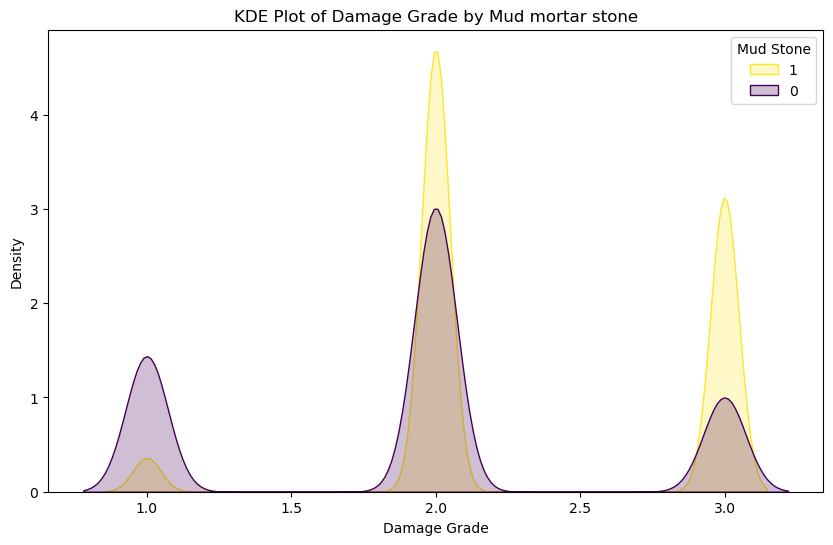

In [469]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_superstructure_mud_mortar_stone"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Mud mortar stone")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Mud Stone", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()


## Inferences
- The above graph tell us that number of buildings which were damaged were made mud mortar stone they are were not severely affected 

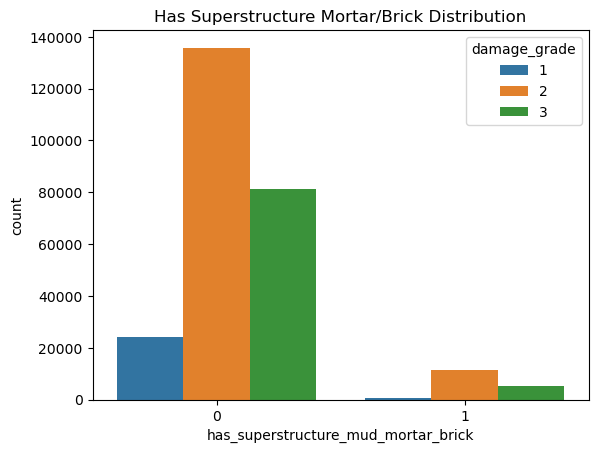

In [470]:
sns.countplot(x = df["has_superstructure_mud_mortar_brick"], hue = label["damage_grade"])
plt.title("Has Superstructure Mortar/Brick Distribution")
plt.show()

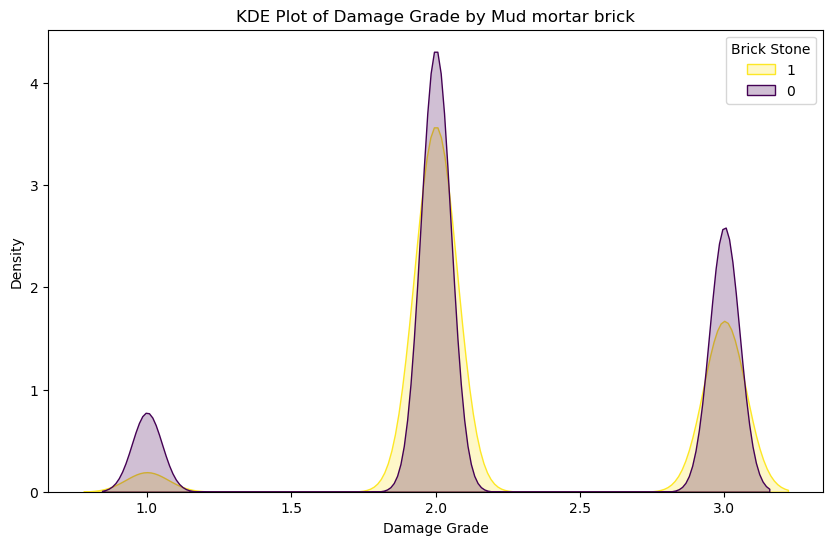

In [471]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_superstructure_mud_mortar_brick"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Mud mortar brick")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Brick Stone", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()


## Inferences
- From the above graph we see that not most the houses were not made of mud mortar brick and so they we were damaged but their percentage in whole is very small

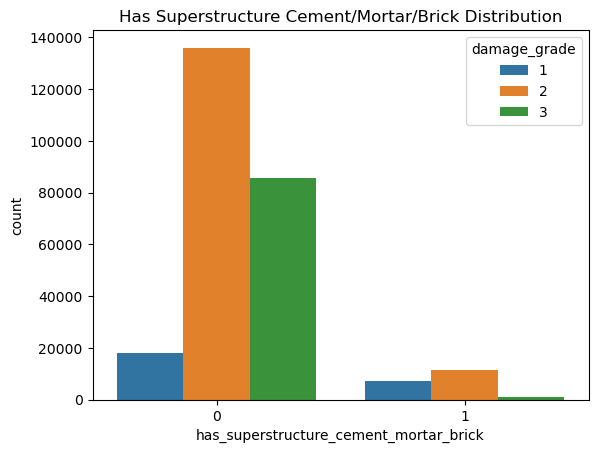

In [472]:
sns.countplot(x = df["has_superstructure_cement_mortar_brick"], hue = label["damage_grade"])
plt.title("Has Superstructure Cement/Mortar/Brick Distribution")
plt.show()

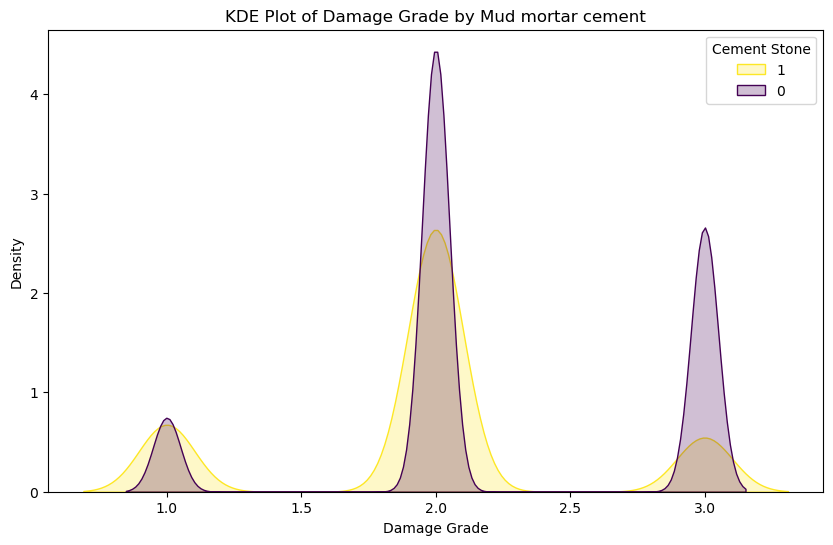

In [473]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_superstructure_cement_mortar_stone"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Mud mortar cement")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Cement Stone", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()


## Inferences
- From the above graph we see that not most the houses were not made of cement and so they we were damaged but their percentage in whole is very small

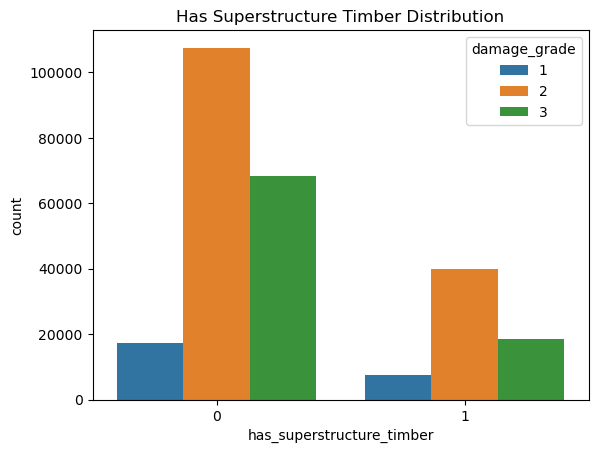

In [474]:
sns.countplot(x = df["has_superstructure_timber"], hue = label["damage_grade"])
plt.title("Has Superstructure Timber Distribution")
plt.show()

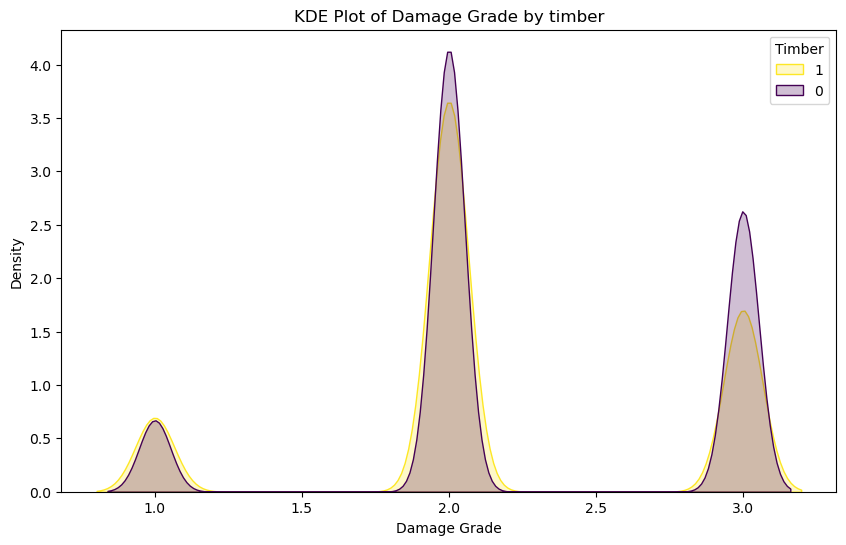

In [475]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_superstructure_timber"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by timber")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Timber", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()


## Inferences

- From the above graph we see that not most the houses were not made of timber and so they we were damaged but their percentage in whole is very small

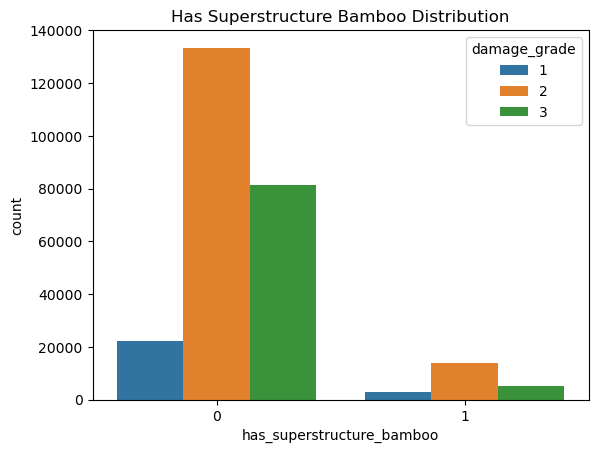

In [476]:
sns.countplot(x = df["has_superstructure_bamboo"], hue = label["damage_grade"])
plt.title("Has Superstructure Bamboo Distribution")
plt.show()

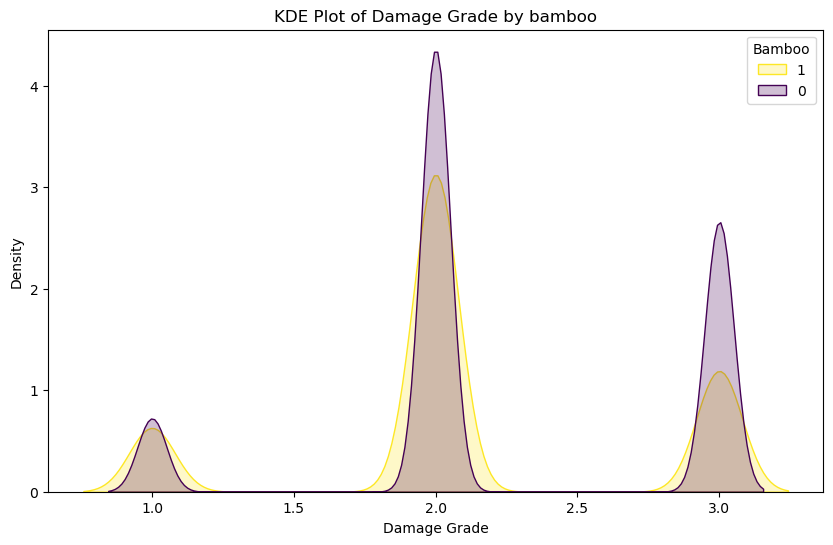

In [477]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_superstructure_bamboo"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by bamboo")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Bamboo", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()


## Inferences
- From the above graph we see that not most the houses were not made of bamboo and so they we were damaged but their percentage in whole is very small

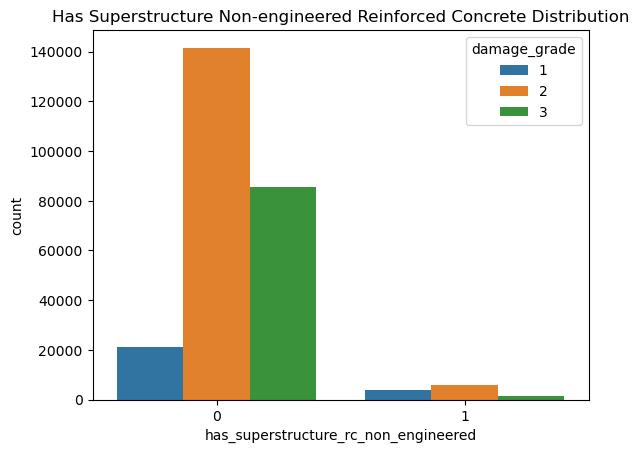

In [478]:
sns.countplot(x = df["has_superstructure_rc_non_engineered"], hue = label["damage_grade"])
plt.title("Has Superstructure Non-engineered Reinforced Concrete Distribution")
plt.show()

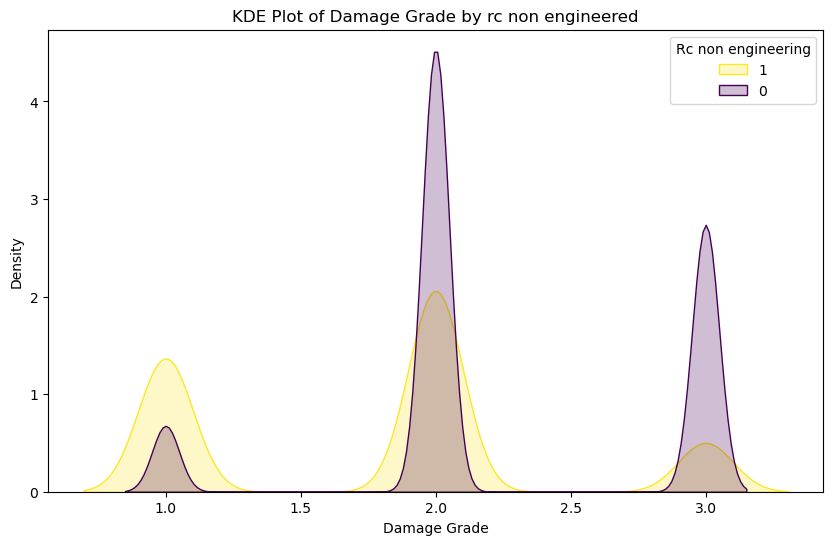

In [479]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_superstructure_rc_non_engineered"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by rc non engineered")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Rc non engineering", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()


## Inferences
- From the above graph we see that not most the houses were not constructed by rc engineering  and so they we were damaged but their percentage in whole is very small

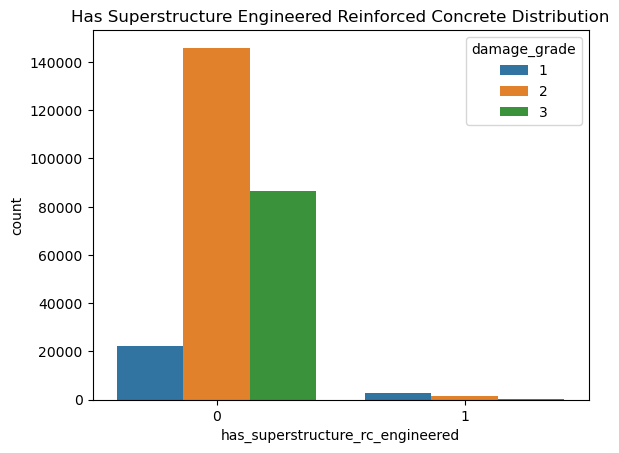

In [480]:
sns.countplot(x = df["has_superstructure_rc_engineered"], hue = label["damage_grade"])
plt.title("Has Superstructure Engineered Reinforced Concrete Distribution")
plt.show()

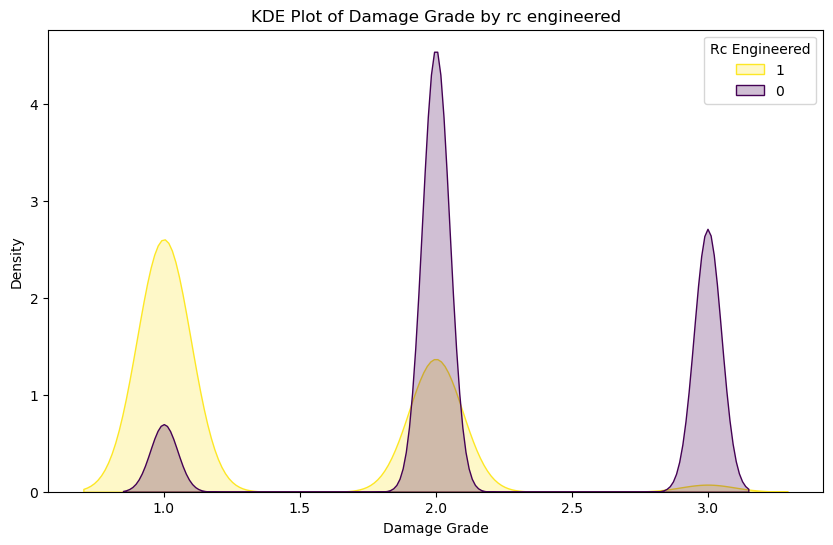

In [481]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_superstructure_rc_engineered"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by rc engineered")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Rc Engineered", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()


## Inferences
- From the above graph we see that not most the houses were  constructed by rc engineering  and so they we were damaged but their percentage in whole is very small 

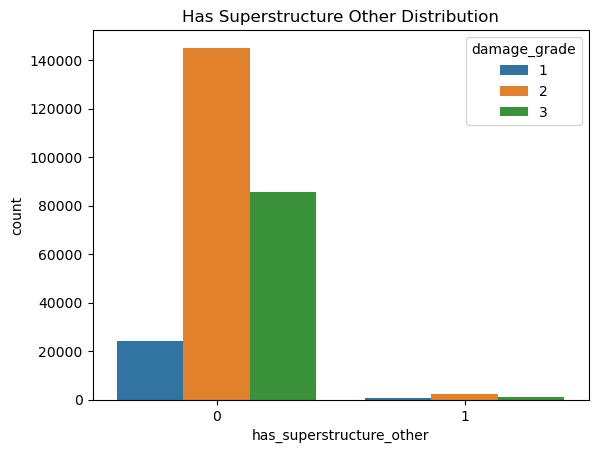

In [482]:
sns.countplot(x = df["has_superstructure_other"], hue = label["damage_grade"])
plt.title("Has Superstructure Other Distribution")
plt.show()

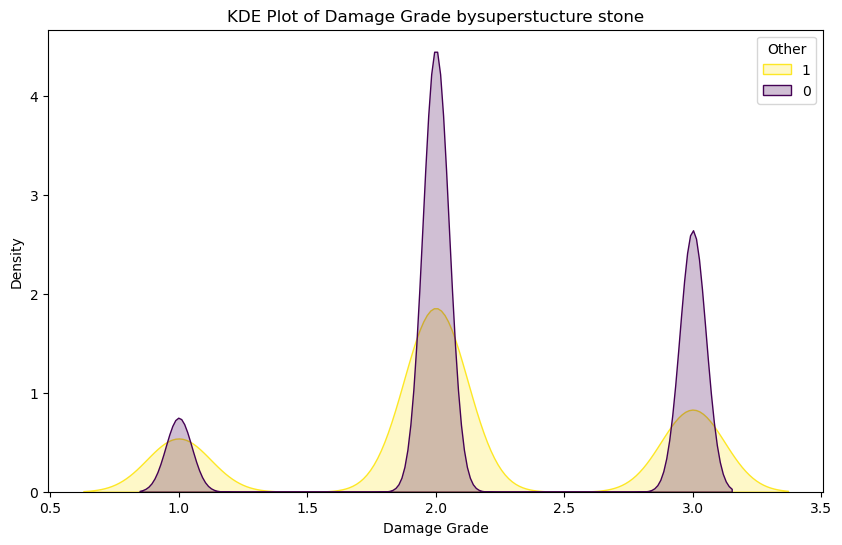

In [483]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_superstructure_other"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade bysuperstucture stone")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Other", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()


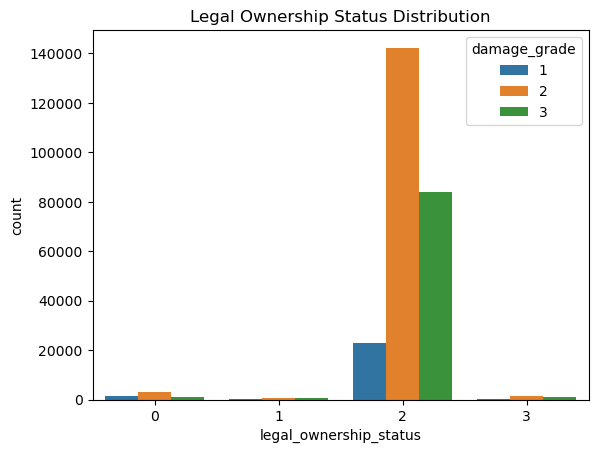

In [484]:
sns.countplot(x =df["legal_ownership_status"], hue = label["damage_grade"])
plt.title("Legal Ownership Status Distribution")
plt.show()

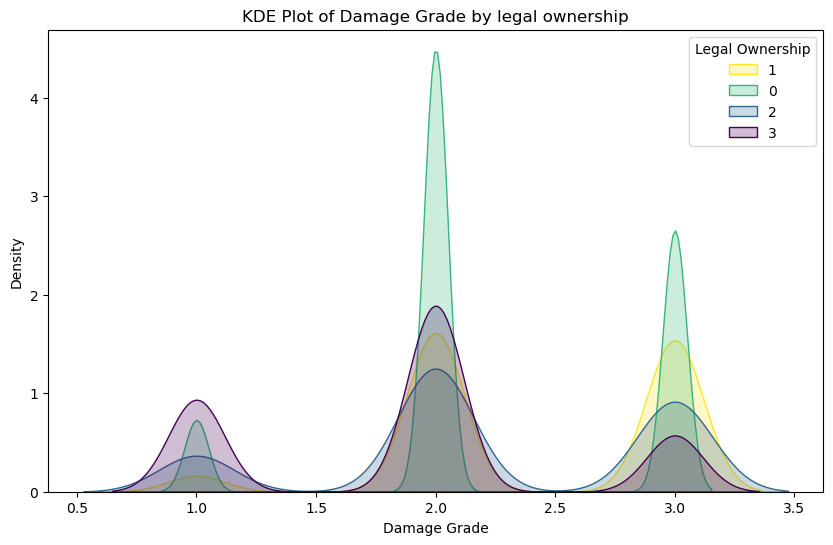

In [485]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["legal_ownership_status"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by legal ownership")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Legal Ownership", bbox_to_anchor=(1, 1),labels=[1,0,2,3])
plt.show()


## Hypothesis 8:


### What is the correlation between the number of family members residing in the building and the family size most significantly impacted?

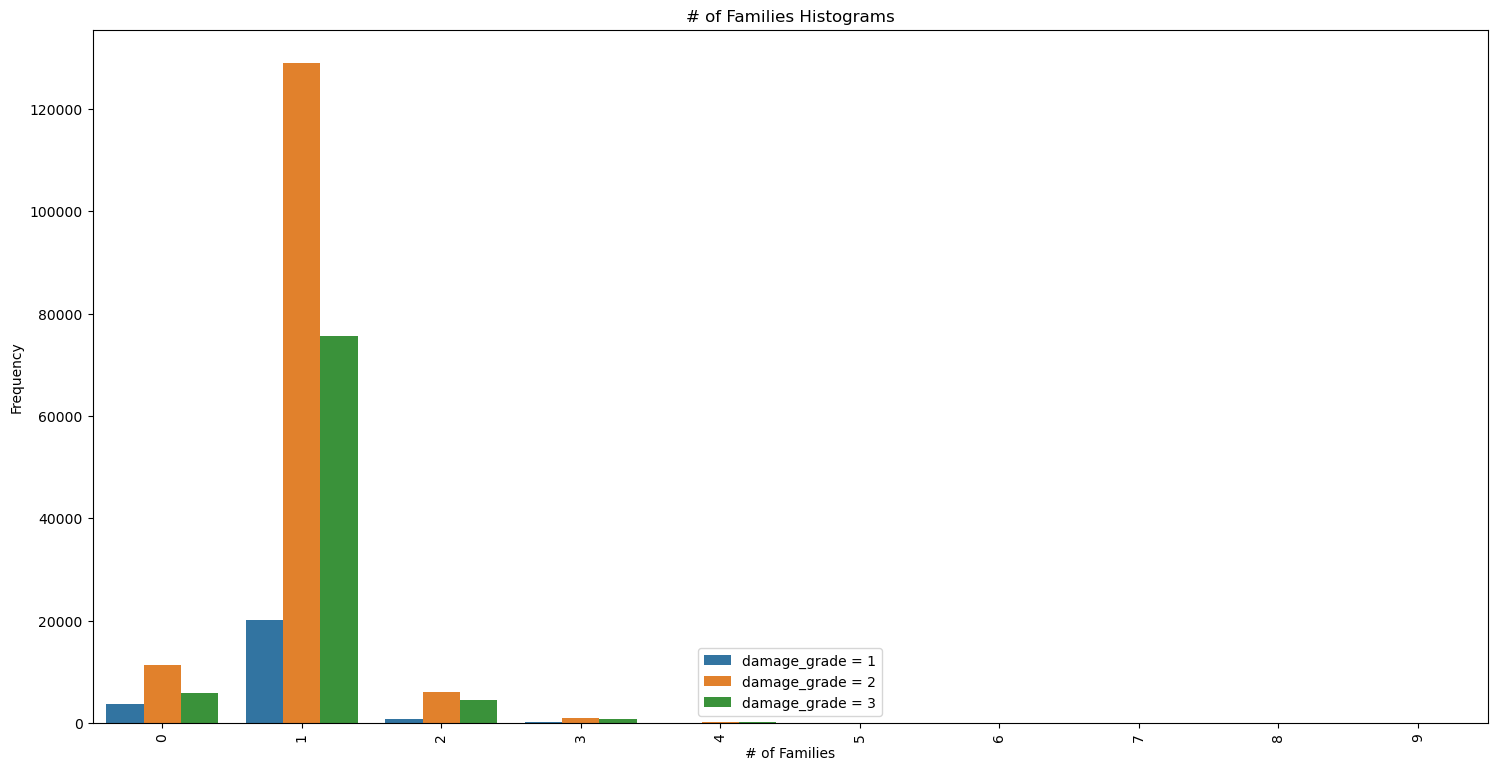

In [486]:
plt.figure(figsize=(18,9))
sns.countplot(x=df["count_families"],hue=label["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("# of Families")
plt.xticks(rotation=90)
plt.title("# of Families Histograms")
plt.legend(["damage_grade = 1","damage_grade = 2","damage_grade = 3"])
plt.show()

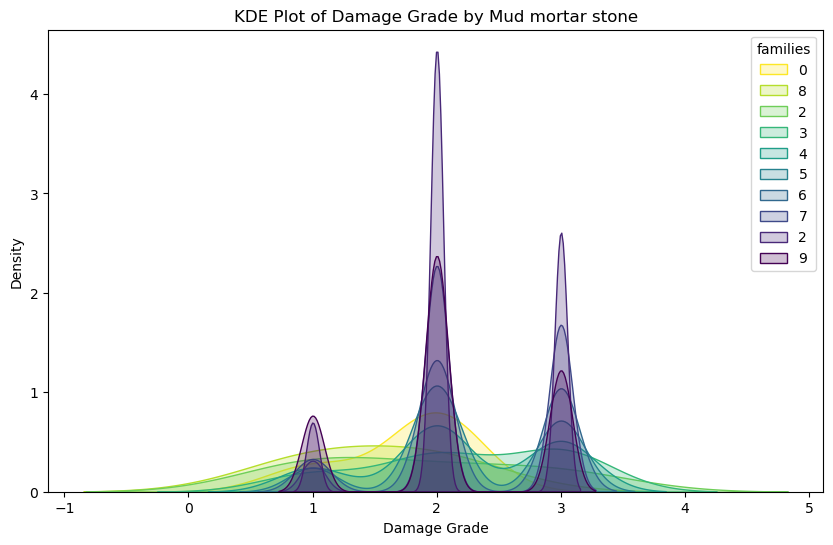

In [487]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["count_families"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Mud mortar stone")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="families", bbox_to_anchor=(1, 1),labels=[0,8,2,3,4,5,6,7,2,9])
plt.show()


## Inferences:
- We see that from the above graph the family size of two was affected the most in the earth quake

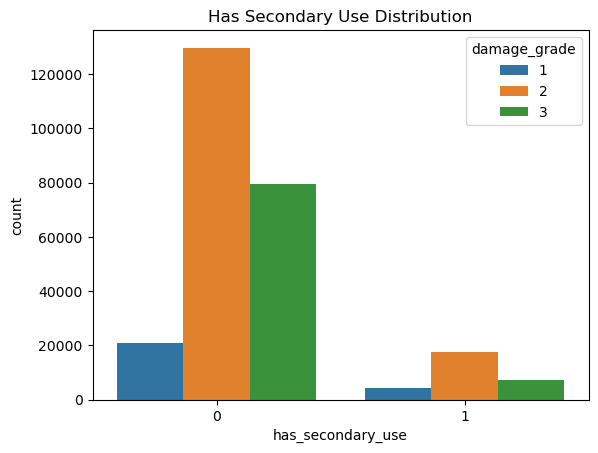

In [488]:
sns.countplot(x = df["has_secondary_use"], hue = label["damage_grade"])
plt.title("Has Secondary Use Distribution")
plt.show()

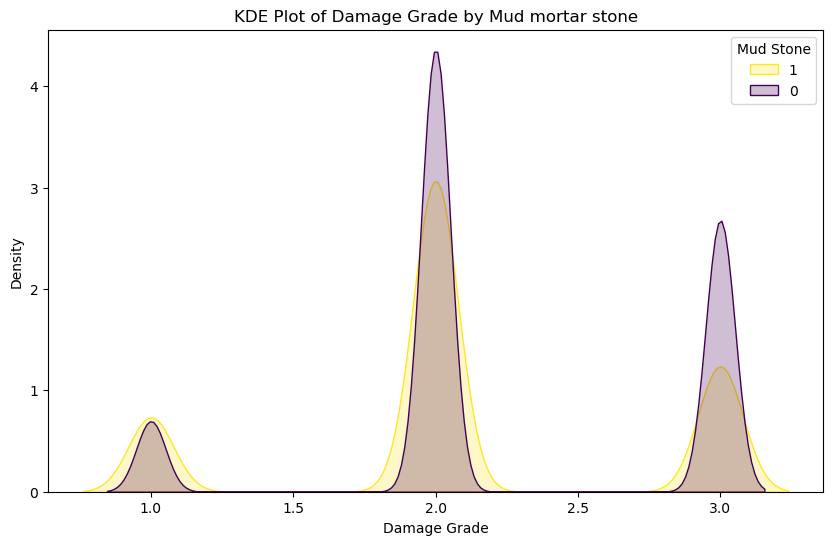

In [489]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_secondary_use"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Mud mortar stone")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Mud Stone", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()


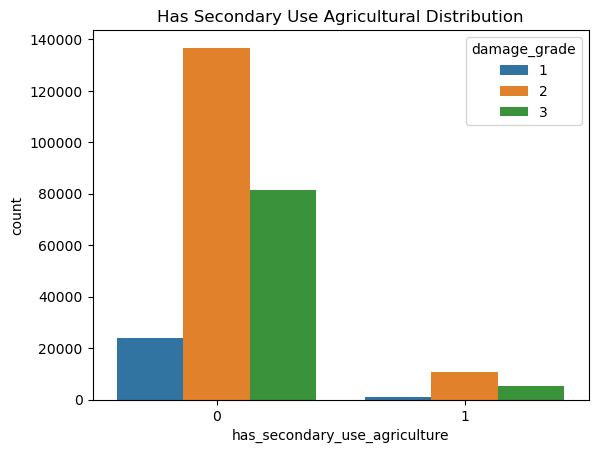

In [490]:
sns.countplot(x = df["has_secondary_use_agriculture"], hue = label["damage_grade"])
plt.title("Has Secondary Use Agricultural Distribution")
plt.show()

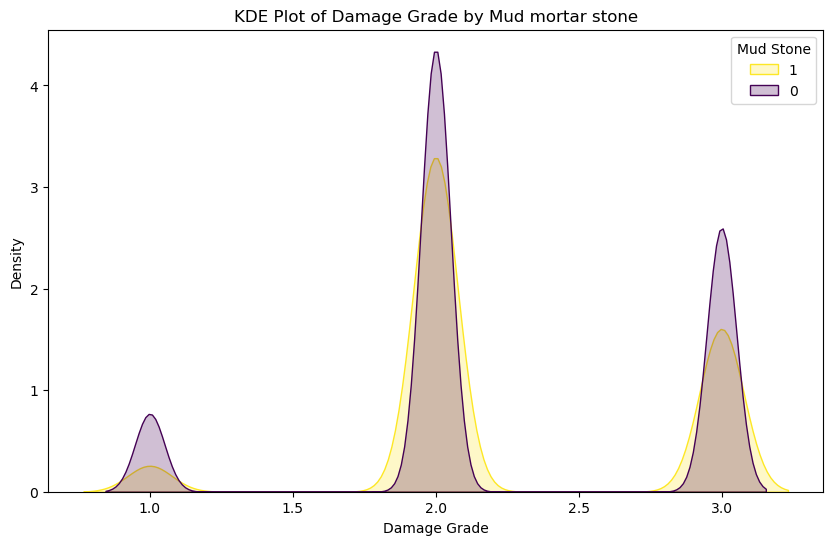

In [491]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_secondary_use_agriculture"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Mud mortar stone")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Mud Stone", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()


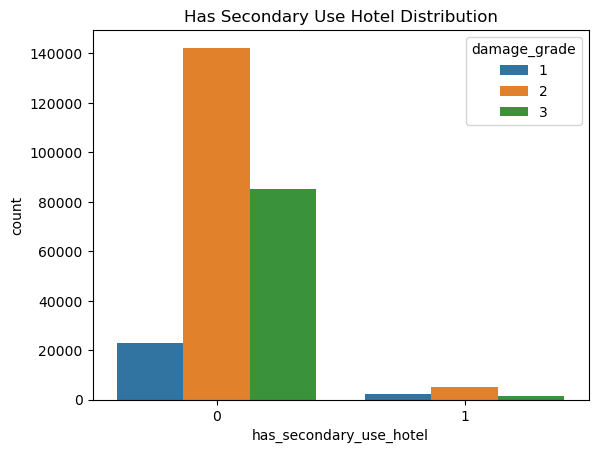

In [492]:
sns.countplot(x = df["has_secondary_use_hotel"], hue = label["damage_grade"])
plt.title("Has Secondary Use Hotel Distribution")
plt.show()

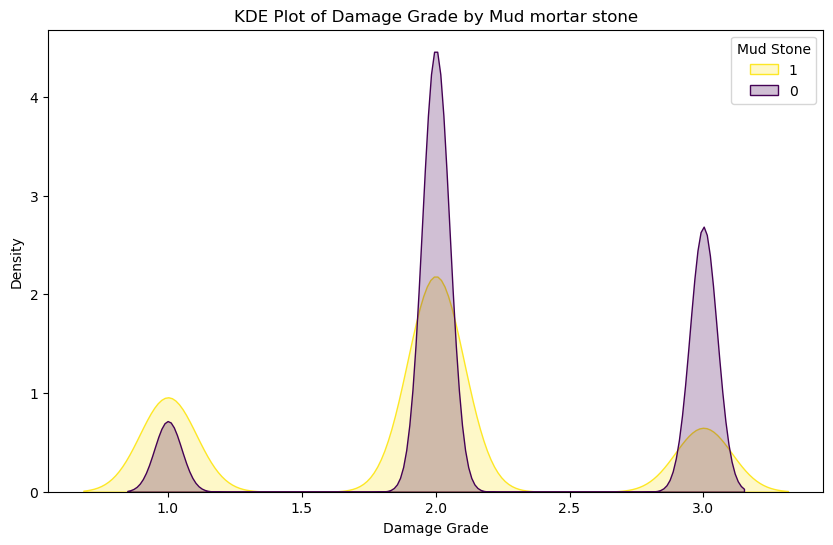

In [493]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_secondary_use_hotel"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Mud mortar stone")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Mud Stone", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()

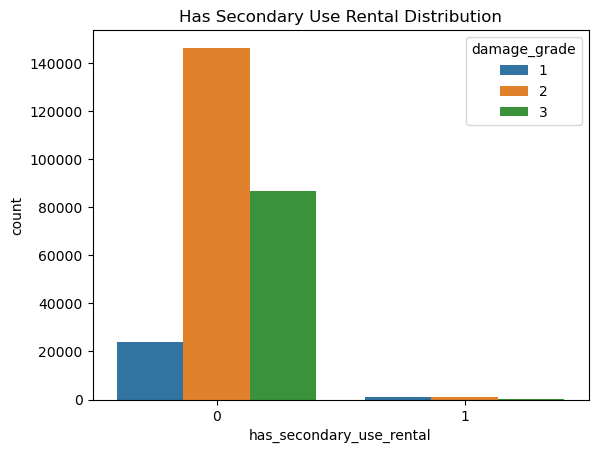

In [494]:
sns.countplot(x = df["has_secondary_use_rental"], hue = label["damage_grade"])
plt.title("Has Secondary Use Rental Distribution")
plt.show()

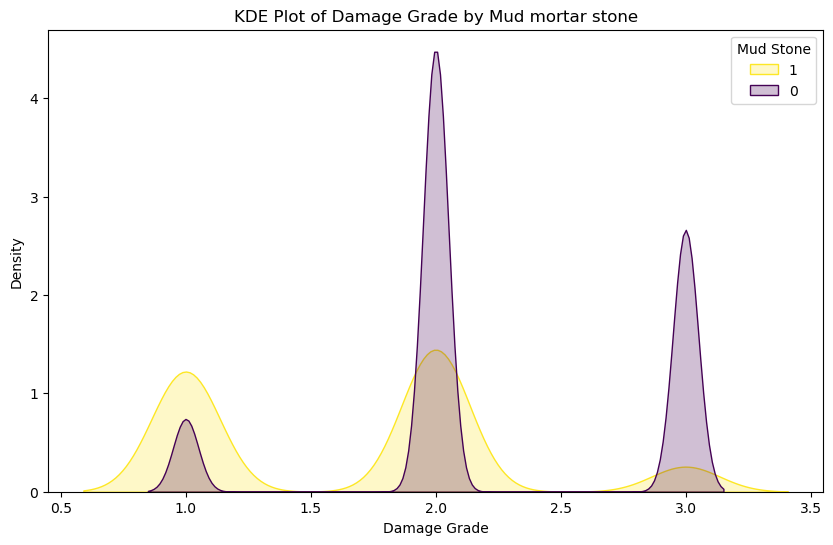

In [495]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_secondary_use_rental"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Mud mortar stone")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Mud Stone", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()

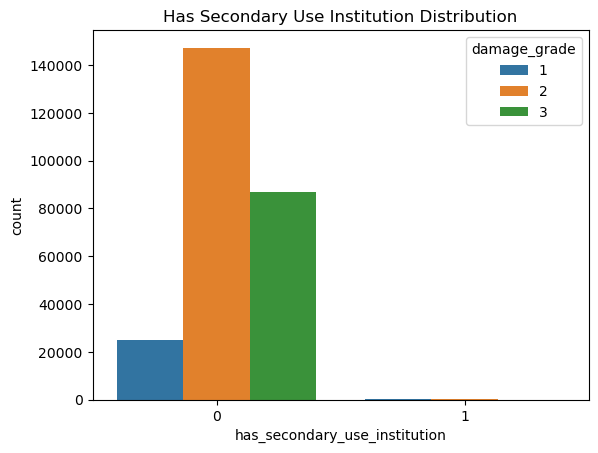

In [496]:
sns.countplot(x = df["has_secondary_use_institution"], hue = label["damage_grade"])
plt.title("Has Secondary Use Institution Distribution")
plt.show()

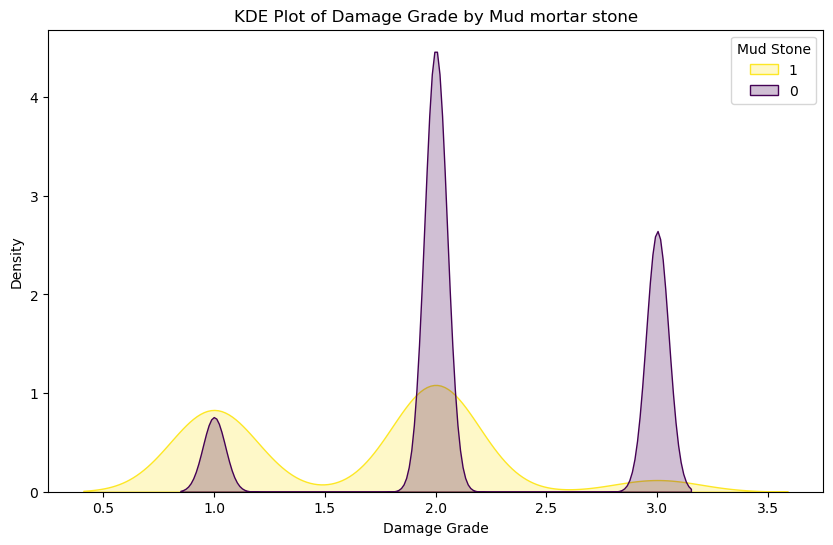

In [497]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_secondary_use_institution"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Mud mortar stone")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Mud Stone", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()

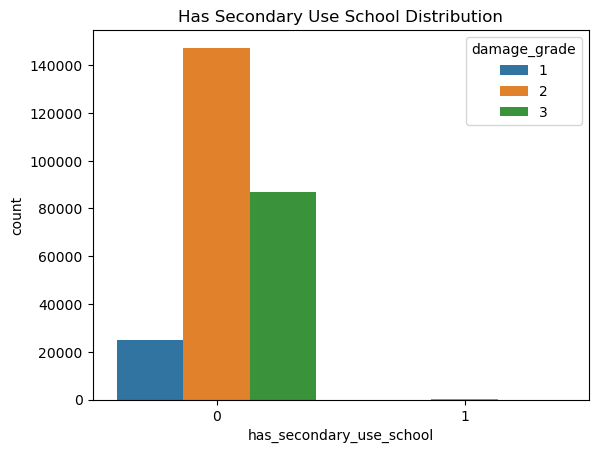

In [498]:
sns.countplot(x = df["has_secondary_use_school"], hue = label["damage_grade"])
plt.title("Has Secondary Use School Distribution")
plt.show()

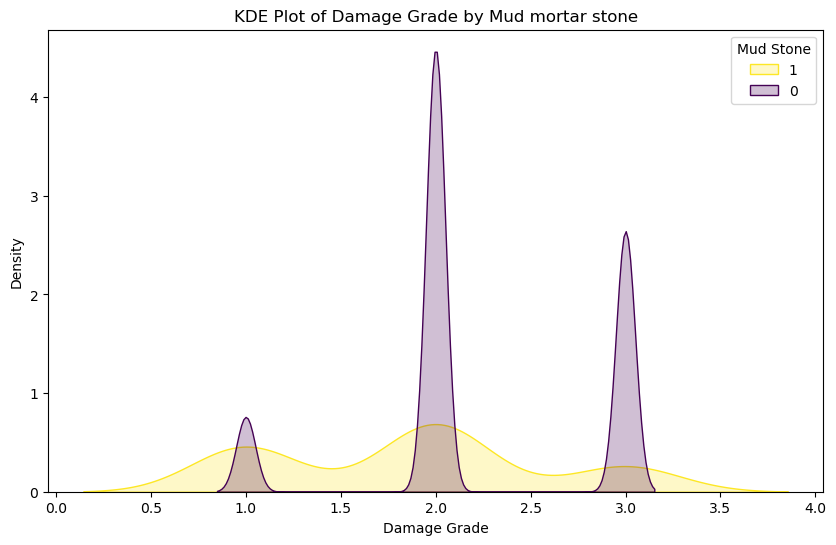

In [499]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_secondary_use_school"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Mud mortar stone")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Mud Stone", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()

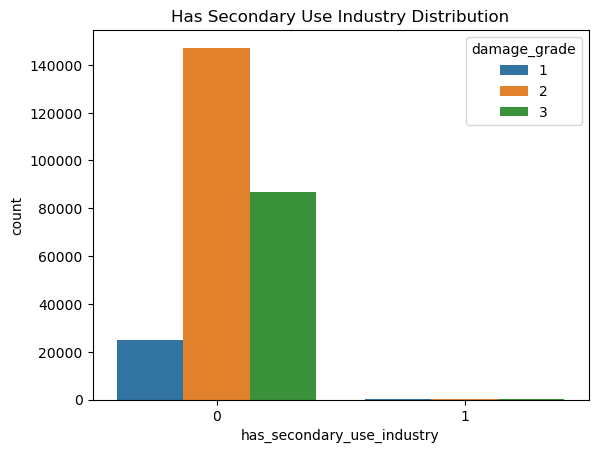

In [500]:
sns.countplot(x = df["has_secondary_use_industry"], hue = label["damage_grade"])
plt.title("Has Secondary Use Industry Distribution")
plt.show()

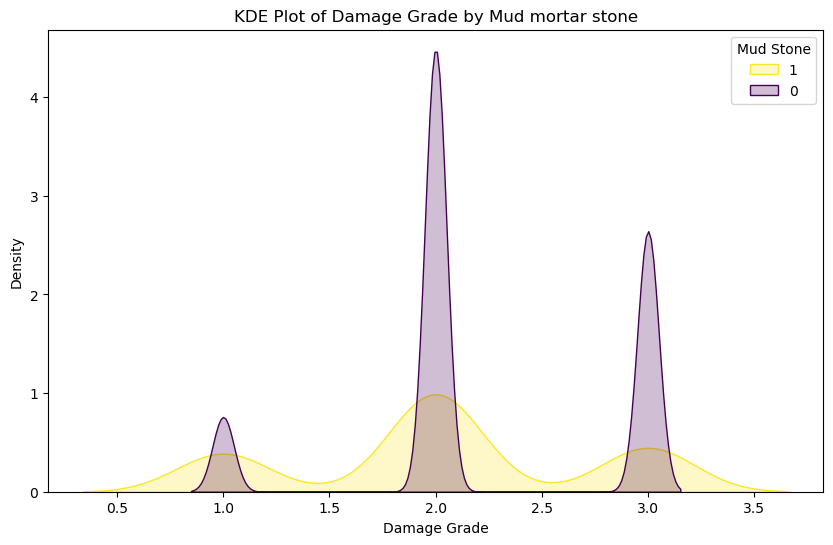

In [501]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_secondary_use_industry"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Mud mortar stone")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Mud Stone", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()

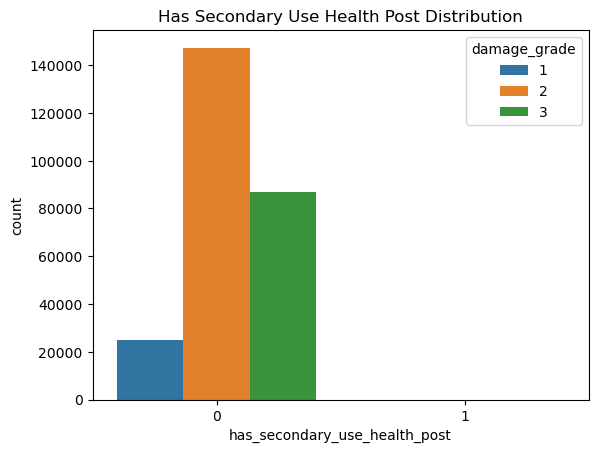

In [502]:
sns.countplot(x = df["has_secondary_use_health_post"], hue = label["damage_grade"])
plt.title("Has Secondary Use Health Post Distribution")
plt.show()

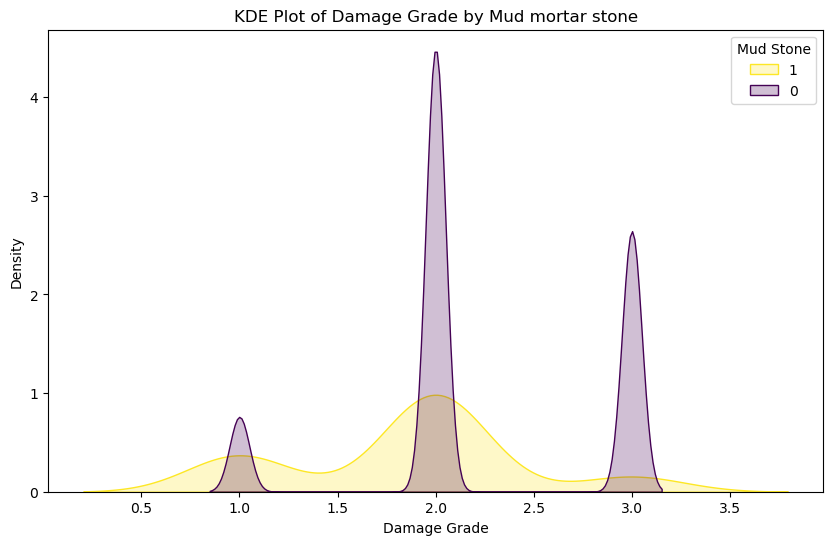

In [503]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_secondary_use_health_post"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Mud mortar stone")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Mud Stone", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()

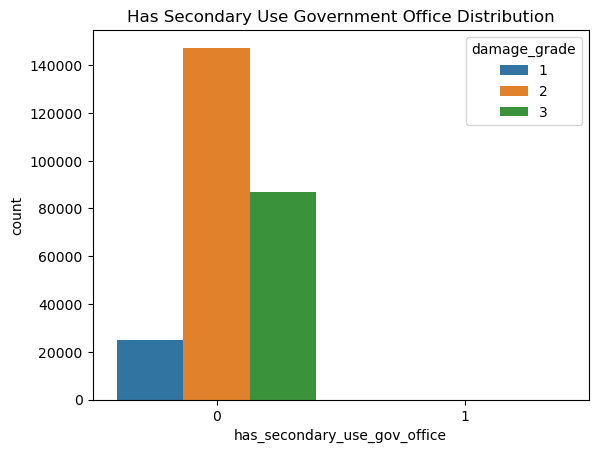

In [504]:
sns.countplot(x = df["has_secondary_use_gov_office"], hue = label["damage_grade"])
plt.title("Has Secondary Use Government Office Distribution")
plt.show()

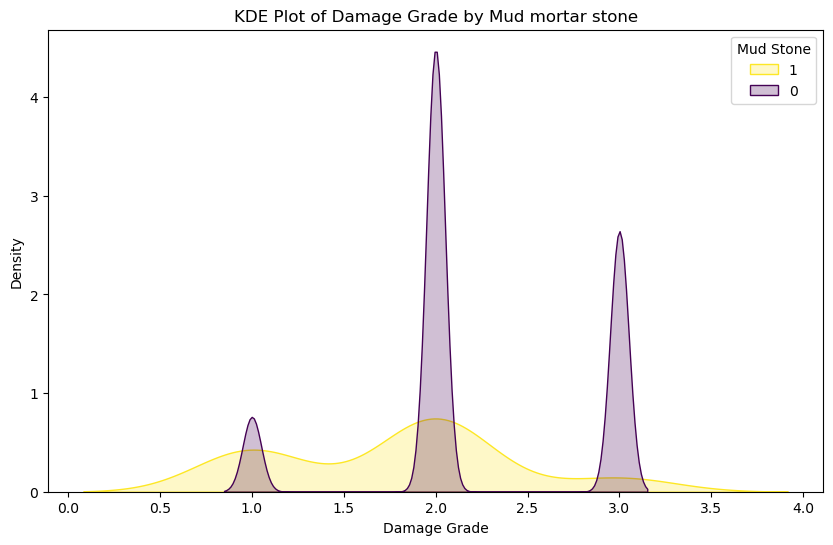

In [505]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_secondary_use_gov_office"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Mud mortar stone")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Mud Stone", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()

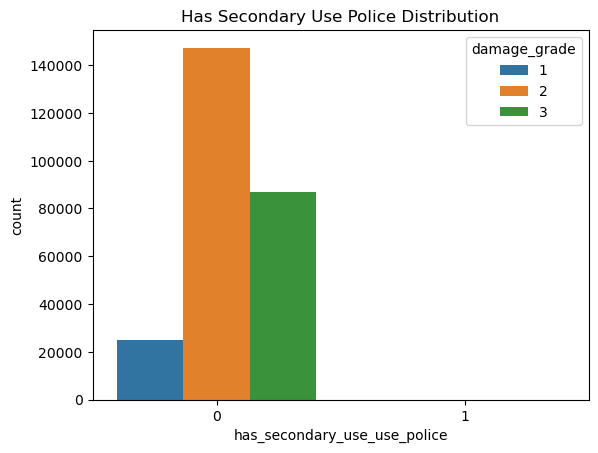

In [506]:
sns.countplot(x = df["has_secondary_use_use_police"], hue = label["damage_grade"])
plt.title("Has Secondary Use Police Distribution")
plt.show()

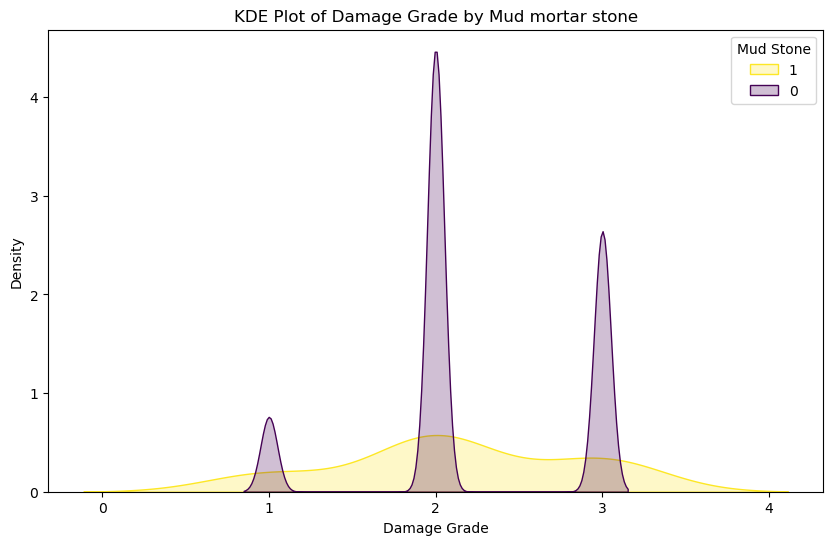

In [507]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_secondary_use_use_police"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Mud mortar stone")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Mud Stone", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()

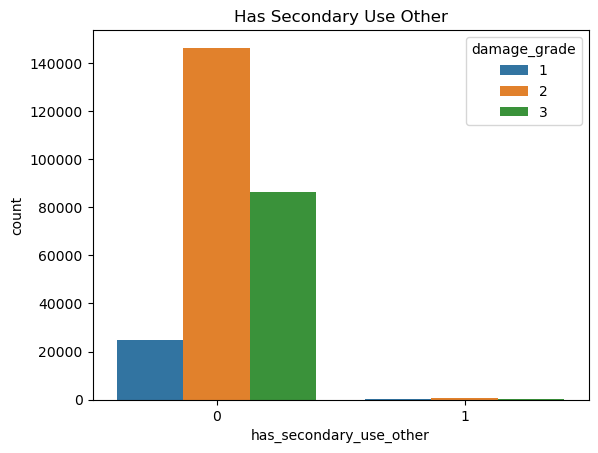

In [508]:
sns.countplot(x = df["has_secondary_use_other"], hue = label["damage_grade"])
plt.title("Has Secondary Use Other")
plt.show()

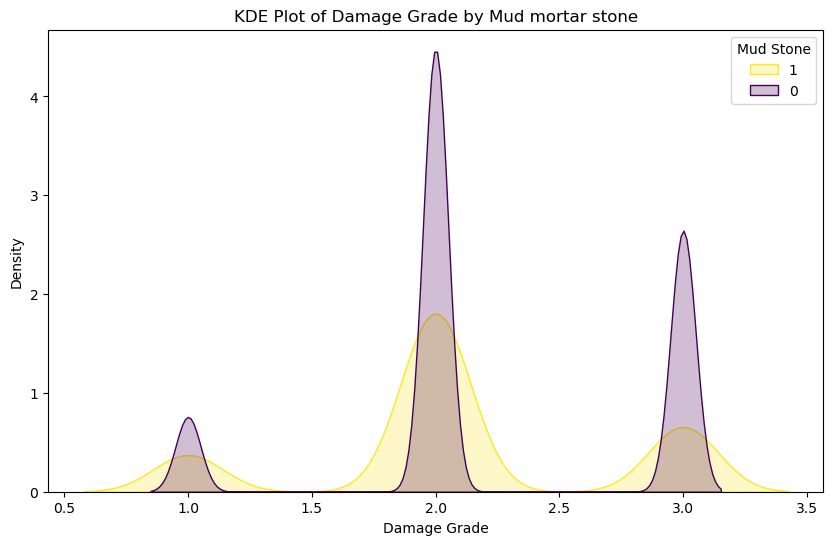

In [509]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=label["damage_grade"], hue=df["has_secondary_use_other"], fill=True, common_norm=False, palette="viridis")
plt.title("KDE Plot of Damage Grade by Mud mortar stone")
plt.xlabel("Damage Grade")
plt.ylabel("Density")
plt.legend(title="Mud Stone", bbox_to_anchor=(1, 1),labels=[1,0])
plt.show()

## Hypothesis 9:


### Which features within the dataset are crucial in determining the extent of damage?

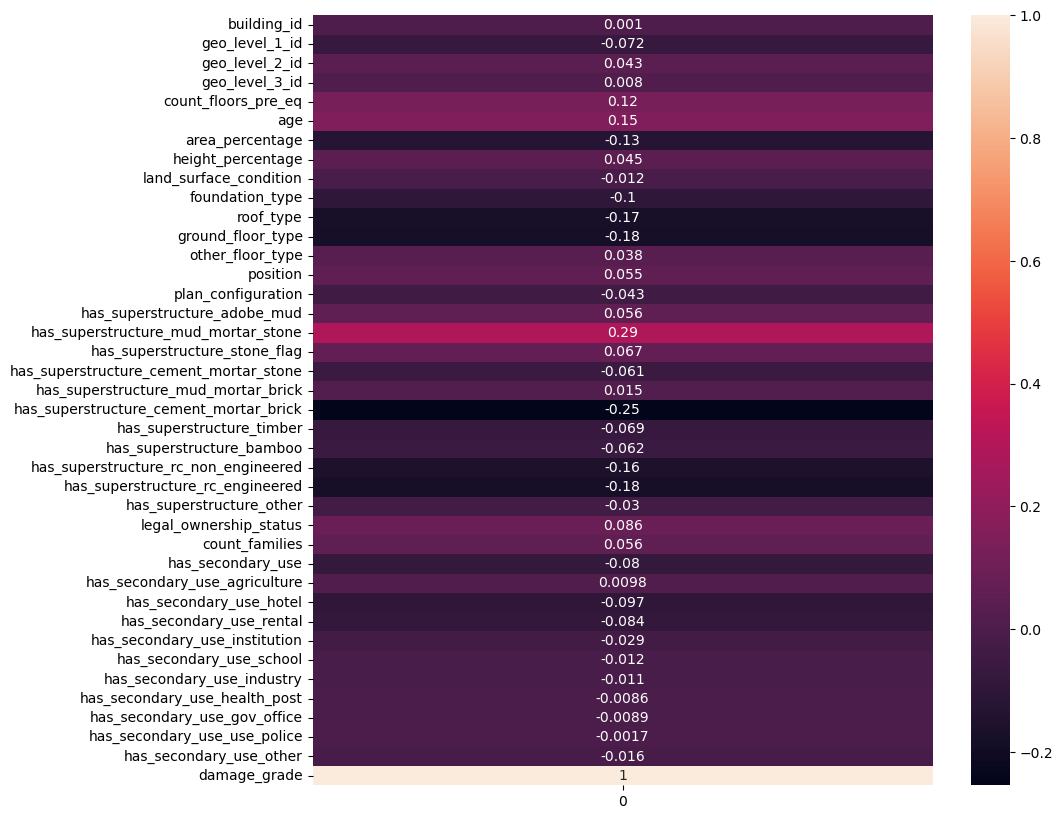

In [510]:
plt.figure(figsize=(10,10))
correlations = df.corrwith(label["damage_grade"])
sns.heatmap(pd.DataFrame(correlations), annot=True)
plt.show()


## Inference
- We see that mud mortar stone has the highest co relation with damage grade followed by age and floor count

In [511]:

data_crosstab = pd.crosstab(label['damage_grade'],
                             df["age"], 
                               margins = False)

pd.DataFrame(data_crosstab)

age             0      5      10     15     20     25     30    35    40   \
damage_grade                                                                
1              7209   5586   4353   2875   1953   1128    639   352   283   
2             12711  19024  22361  20756  18595  14068  10440  6243  6086   
3              6098   9069  12156  12349  11606   9150   6933  4109  4183   

age            45   ...  155  160  165  170  175  180  185  190  195  200  
damage_grade        ...                                                    
1              120  ...    0    0    0    0    0    0    0    0    0    3  
2             2802  ...    0    3    2    4    3    5    1    2    2   64  
3             1787  ...    1    3    0    2    2    2    0    1    0   39  

[3 rows x 41 columns]

<Figure size 1200x800 with 0 Axes>

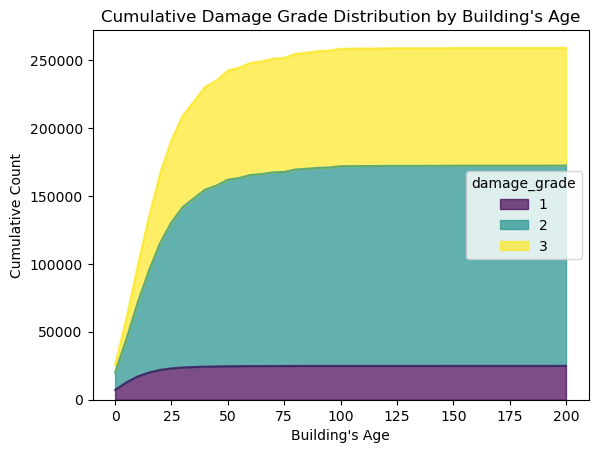

In [512]:
plt.figure(figsize=(12, 8))
data_crosstab.cumsum(axis=1).T.plot(kind='area', cmap='viridis', alpha=0.7)
plt.title("Cumulative Damage Grade Distribution by Building's Age")
plt.xlabel("Building's Age")
plt.ylabel("Cumulative Count")
plt.show()


In [513]:

data_crosstab = pd.crosstab(label['damage_grade'],
                             df["count_floors_pre_eq"], 
                               margins = False)
pd.DataFrame(data_crosstab)

count_floors_pre_eq      1      2      3     4     5    6   7  9
damage_grade                                                    
1                     8936  12464   2508   703   252   50   8  1
2                    20697  93428  28304  3342  1458  127  19  0
3                    10621  49797  24437  1339   506   23   2  0

<Figure size 1200x800 with 0 Axes>

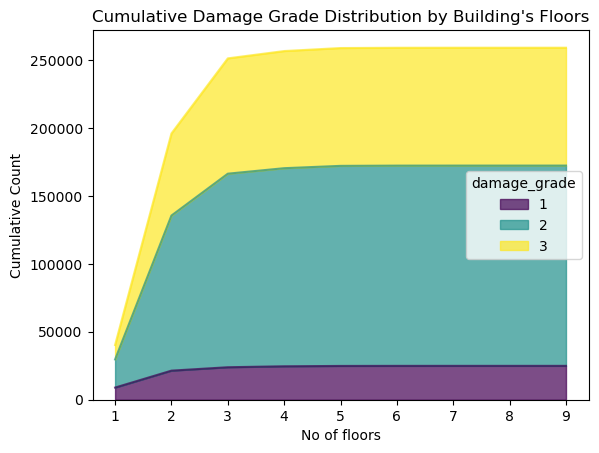

In [514]:
plt.figure(figsize=(12, 8))
data_crosstab.cumsum(axis=1).T.plot(kind='area', cmap='viridis', alpha=0.7)
plt.title("Cumulative Damage Grade Distribution by Building's Floors")
plt.xlabel("No of floors")
plt.ylabel("Cumulative Count")
plt.show()


<Figure size 1200x800 with 0 Axes>

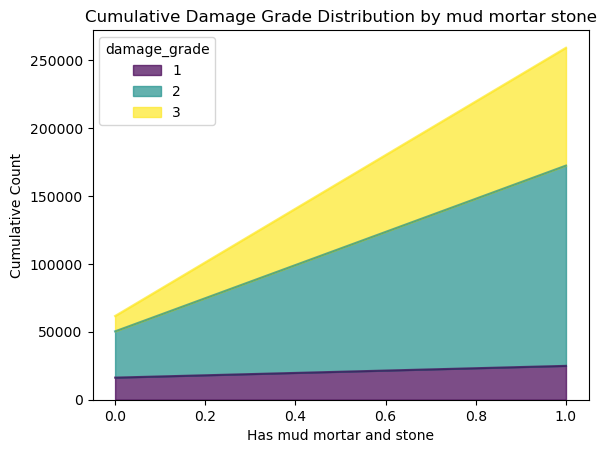

In [515]:

data_crosstab = pd.crosstab(label['damage_grade'],
                             df["has_superstructure_mud_mortar_stone"], 
                               margins = False)
pd.DataFrame(data_crosstab)

plt.figure(figsize=(12, 8))
data_crosstab.cumsum(axis=1).T.plot(kind='area', cmap='viridis', alpha=0.7)
plt.title("Cumulative Damage Grade Distribution by mud mortar stone")
plt.xlabel("Has mud mortar and stone")
plt.ylabel("Cumulative Count")
plt.show()


In [516]:

data_crosstab = pd.crosstab(label['damage_grade'],
                             df["height_percentage"], 
                               margins = False)
pd.DataFrame(data_crosstab)

height_percentage    2      3      4      5      6      7     8     9     10  \
damage_grade                                                                   
1                  1492   6102   3626   5202   3252   2244   569   841   699   
2                  4823  13558  21973  46498  25721  19453  8032  3043  2540   
3                  2941   6179  11941  26381  17301  13513  5221  1447  1218   

height_percentage   11   12   13  14   15  16  17  18  19  20  21  
damage_grade                                                       
1                   61  316  242  20  128  78   2  25   2  16   5  
2                  580  455  394  42  122  78   5  35   5  12   6  
3                  259  132  115   4   35  22   1   8   0   5   2

<Figure size 1200x800 with 0 Axes>

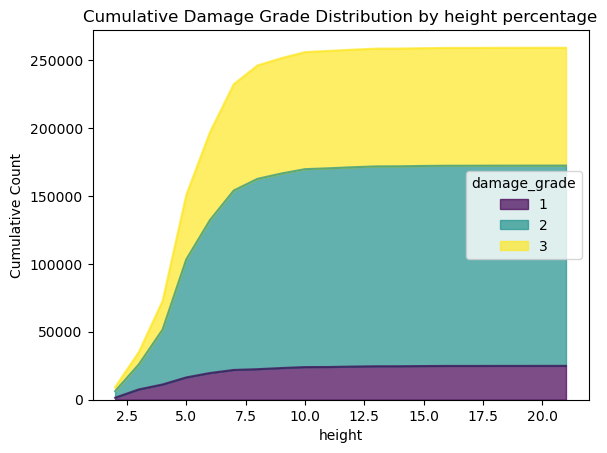

In [517]:
plt.figure(figsize=(12, 8))
data_crosstab.cumsum(axis=1).T.plot(kind='area', cmap='viridis', alpha=0.7)
plt.title("Cumulative Damage Grade Distribution by height percentage")
plt.xlabel("height")
plt.ylabel("Cumulative Count")
plt.show()


In [518]:

data_crosstab = pd.crosstab(label['damage_grade'],
                             df["legal_ownership_status"], 
                               margins = False)
pd.DataFrame(data_crosstab)

legal_ownership_status     0    1       2     3
damage_grade                                   
1                       1510  212   23070   130
2                       3053  725  142300  1297
3                        924  530   84034  1237

<Figure size 1200x800 with 0 Axes>

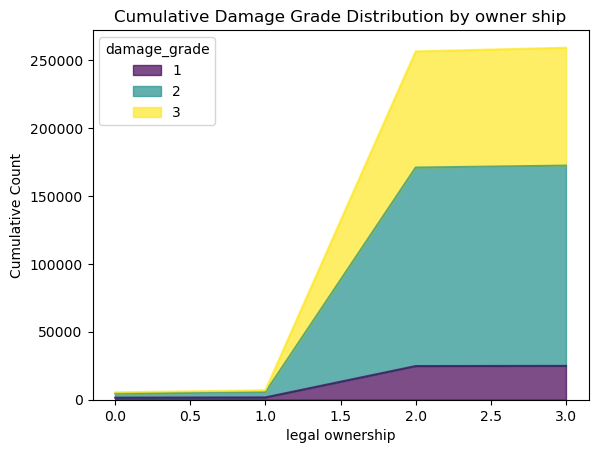

In [519]:
plt.figure(figsize=(12, 8))
data_crosstab.cumsum(axis=1).T.plot(kind='area', cmap='viridis', alpha=0.7)
plt.title("Cumulative Damage Grade Distribution by owner ship")
plt.xlabel("legal ownership")
plt.ylabel("Cumulative Count")
plt.show()


In [520]:

data_crosstab = pd.crosstab(label['damage_grade'],
                             df["geo_level_2_id"], 
                               margins = False)
pd.DataFrame(data_crosstab)

geo_level_2_id  0.000000  0.000701  0.002102  0.002803  0.003504  0.004205  \
damage_grade                                                                 
1                      0         0         5         2         0         1   
2                      9       133        59       147        21         1   
3                     29        71        13       166         4         0   

geo_level_2_id  0.004905  0.005606  0.006307  0.007008  ...  0.993693  \
damage_grade                                            ...             
1                      1         3         0        12  ...        54   
2                     61        94        83       290  ...        86   
3                     38        23       250        52  ...        12   

geo_level_2_id  0.994394  0.995095  0.995795  0.996496  0.997197  0.997898  \
damage_grade                                                                 
1                      0         0         0         0         0         0   
2                     35         7        38       197         3         7   
3                     59         3       216        19         0         0   

geo_level_2_id  0.998598  0.999299  1.000000  
damage_grade                                  
1                      1         3         0  
2                    138        51         1  
3                    327       201         5  

[3 rows x 1414 columns]

<Figure size 1200x800 with 0 Axes>

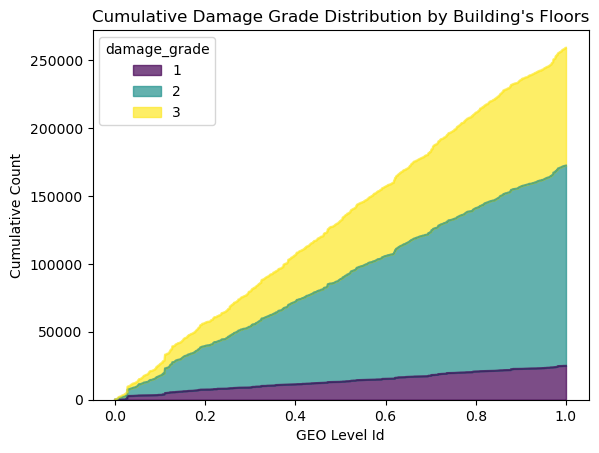

In [521]:
plt.figure(figsize=(12, 8))
data_crosstab.cumsum(axis=1).T.plot(kind='area', cmap='viridis', alpha=0.7)
plt.title("Cumulative Damage Grade Distribution by Building's Floors")
plt.xlabel("GEO Level Id")
plt.ylabel("Cumulative Count")
plt.show()


In [522]:


def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union





In [523]:
a=label['damage_grade']
b=df['geo_level_2_id']
similarity=jaccard(a, b)
print(similarity)

1.9244758689970786e-06


In [524]:
a

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: int64

In [525]:
a=label['damage_grade']
b=df['age']
jaccard(a, b)

0.0

In [526]:
a=label['damage_grade']
b=df['count_floors_pre_eq']
jaccard(a, b)

5.773449828720988e-06

In [527]:
a=label['damage_grade']
b=df['has_superstructure_mud_mortar_stone']
jaccard(a, b)

1.9244758689970786e-06

In [528]:
a=label['damage_grade']
b=df['height_percentage']
jaccard(a, b)

3.848959145223153e-06

In [529]:
a=label['damage_grade']
b=df['legal_ownership_status']
jaccard(a, b)

5.773449828720988e-06

In [530]:
df.shape

(259022, 40)

In [531]:
df

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906        0.200000        0.341275        0.970637   
1             28830        0.266667        0.630694        0.223761   
2             94947        0.700000        0.254380        0.714013   
3            590882        0.733333        0.292922        0.850959   
4            201944        0.366667        0.091801        0.118405   
...             ...             ...             ...             ...   
260596       688636        0.833333        0.935529        0.128989   
260597       669485        0.566667        0.501051        0.163921   
260598       602512        0.566667        0.035739        0.649558   
260599       151409        0.866667        0.027330        0.147291   
260600       747594        0.700000        0.006307        0.724198   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

        land_surface_condition  foundation_type  ...  has_secondary_use_hotel  \
0                            2                2  ...                        0   
1                            1                2  ...                        0   
2                            2                2  ...                        0   
3                            2                2  ...                        0   
4                            2                2  ...                        0   
...                        ...              ...  ...                      ...   
260596                       0                2  ...                        0   
260597                       2                2  ...                        0   
260598                       2                2  ...                        0   
260599                       2                2  ...                        0   
260600                       0                2  ...                        0   

        has_secondary_use_rental  has_secondary_use_institution  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   
...                          ...                            ...   
260596                         0                              0   
260597                         0                              0   
260598                         0                              0   
260599                         0                              0   
260600                         0                              0   

        has_secondary_use_school  has_secondary_use_industry  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   
...                          ...                         ...   
260596                         0                           0   


In [532]:
df['damage_grade']

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 259022, dtype: int64

In [533]:
y

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                           t               r  ...                       0   
1                           o               r  ...                       0   
2                           t               r  ...                       0   
3                           t               r  ...                       0   
4                           t               r  ...                       0   
...                       ...             ...  ...                     ...   
260596                      n               r  ...                       0   
260597                      t               r  ...                       0   
260598                      t               r  ...                       0   
260599                      t               r  ...                       0   
260600                      n               r  ...                       0   

       has_secondary_use_rental has_secondary_use_institution  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
...                         ...                           ...   
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school has_secondary_use_industry  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   
...                         ...                        ...   
260596                        0                          0   
260597                        0                          0   
260598        

In [534]:
from scipy.stats.mstats import winsorize

C:\Users\chand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


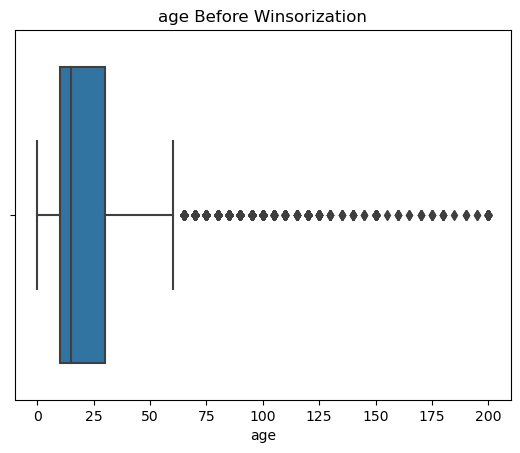

C:\Users\chand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


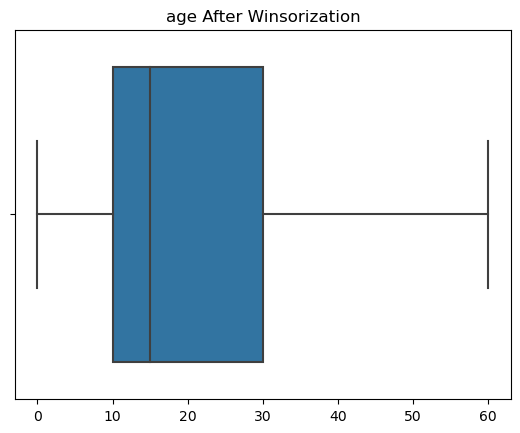

In [535]:

name = "age"
data = df[name]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.05))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
df[name] = winsorized_data

C:\Users\chand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


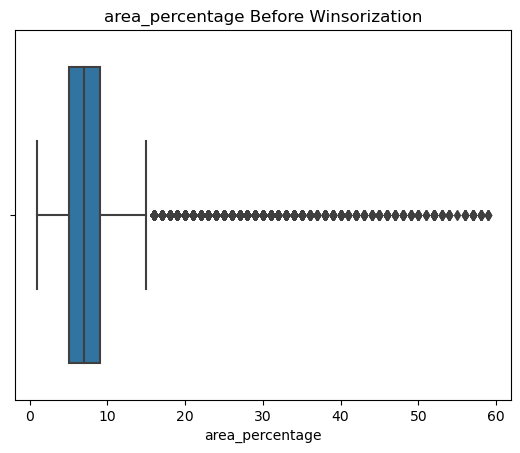

C:\Users\chand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


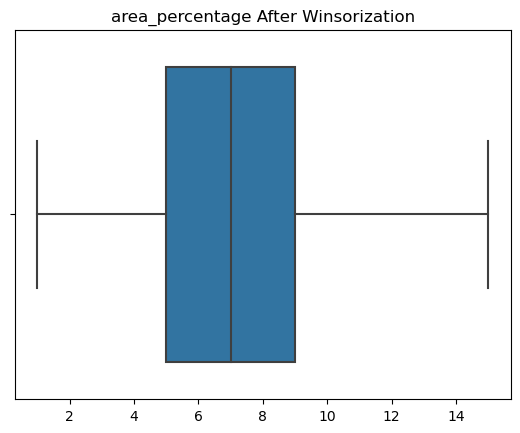

In [536]:
#Data source
name = "area_percentage"
data = df[name]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.055))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
df[name] = winsorized_data

C:\Users\chand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


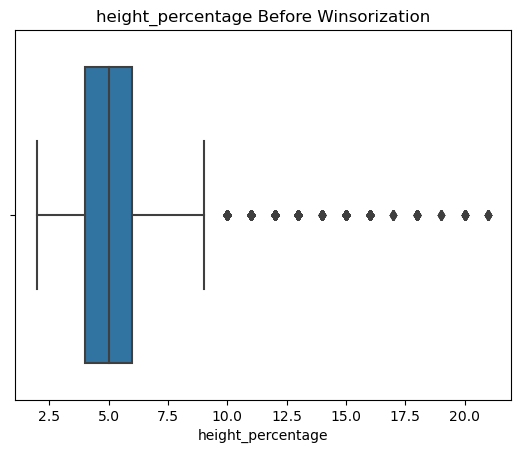

C:\Users\chand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


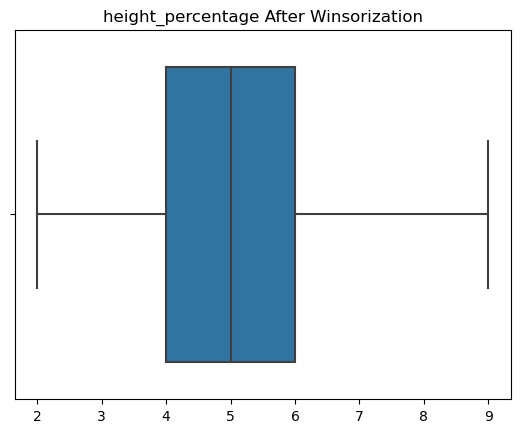

In [537]:
#Data source
name = "height_percentage"
data = df[name]

#Before winsorization
sns.boxplot(data)
plt.title("{} Before Winsorization".format(name))
plt.show()

#Winsorization
winsorized_data = winsorize(data,(0, 0.04))

#After winsorization
sns.boxplot(winsorized_data)
plt.title("{} After Winsorization".format(name))
plt.show()

#Replace data in dataset
df[name] = winsorized_data

In [538]:
df.drop(columns=["building_id"], inplace=True)
label.drop(columns=["building_id"], inplace=True)
df = pd.get_dummies(df, drop_first = True)


In [539]:
from sklearn.metrics import f1_score as score 
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time

In [540]:
X = df
y = df['damage_grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

dt = DecisionTreeClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = dt.fit(X_train, y_train)
dt_time_fit = time.time() - start_time

start_time = time.time()
model.predict(X_test)
dt_time_pred = time.time() - start_time
print("Decision Tree")
print("Fit Time: {} seconds".format(dt_time_fit))
print("Prediction Time: {} seconds".format(dt_time_pred))
print("Training Score: {}".format(dt.score(X_train, y_train)))
print("Test Score: {}".format(dt.score(X_test, y_test)))
print("----------------------------------------")


rf = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = rf.fit(X_train, y_train)
rf_time_fit = time.time() - start_time

#Predictions - Decision Tree
start_time = time.time()
model.predict(X_test)
rf_time_pred = time.time() - start_time
print("Random Forest")
print("Fit Time: {} seconds".format(rf_time_fit))
print("Prediction Time: {} seconds".format(rf_time_pred))
print("Training Score: {}".format(rf.score(X_train, y_train)))
print("Test Score: {}".format(rf.score(X_test, y_test)))


Decision Tree
Fit Time: 0.24425745010375977 seconds
Prediction Time: 0.009998321533203125 seconds
Training Score: 1.0
Test Score: 1.0
----------------------------------------
Random Forest
Fit Time: 11.990800380706787 seconds
Prediction Time: 0.17171907424926758 seconds
Training Score: 1.0
Test Score: 1.0


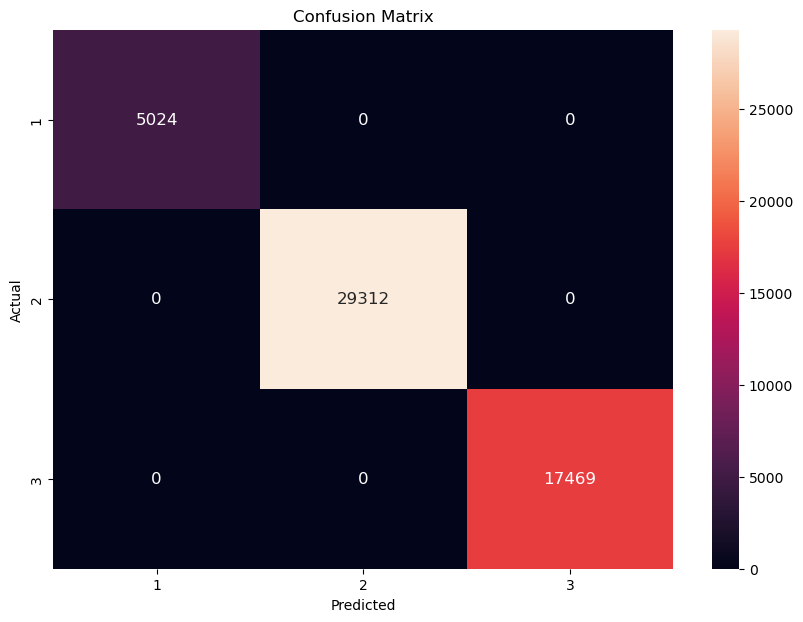

In [541]:
y_pred = rf.predict(X_test)

data = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.show()